In [1]:

import os, types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
cos_client = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='98fZIud0WsnZ0UrwjJxjni6xMgqB7XZyifuyW8Obnors',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.private.us.cloud-object-storage.appdomain.cloud')

bucket = 'phishingdetection-donotdelete-pr-krimojsrtlzyvc'
object_key = 'dataset_website.csv'

body = cos_client.get_object(Bucket=bucket,Key=object_key)['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df = pd.read_csv(body)
df.head()


,index,having_IPhaving_IP_Address,URLURL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
0,1,-1,1,1,1,-1,-1,-1,-1,-1,...,1,1,-1,-1,-1,-1,1,1,-1,-1
1,2,1,1,1,1,1,-1,0,1,-1,...,1,1,-1,-1,0,-1,1,1,1,-1
2,3,1,0,1,1,1,-1,-1,-1,-1,...,1,1,1,-1,1,-1,1,0,-1,-1
3,4,1,0,1,1,1,-1,-1,-1,1,...,1,1,-1,-1,1,-1,1,-1,1,-1
4,5,1,0,-1,1,1,-1,1,1,-1,...,-1,1,-1,-1,0,-1,1,1,1,1


In [2]:
pwd

'/home/wsuser/work'

# Import Required Libraries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn import metrics 
import warnings
warnings.filterwarnings('ignore')

In [4]:
#Shape of dataframe

df.shape

(11055, 32)

In [5]:
#Listing the features of the dataset

df.columns

Index(['index', 'having_IPhaving_IP_Address', 'URLURL_Length',
       'Shortining_Service', 'having_At_Symbol', 'double_slash_redirecting',
       'Prefix_Suffix', 'having_Sub_Domain', 'SSLfinal_State',
       'Domain_registeration_length', 'Favicon', 'port', 'HTTPS_token',
       'Request_URL', 'URL_of_Anchor', 'Links_in_tags', 'SFH',
       'Submitting_to_email', 'Abnormal_URL', 'Redirect', 'on_mouseover',
       'RightClick', 'popUpWidnow', 'Iframe', 'age_of_domain', 'DNSRecord',
       'web_traffic', 'Page_Rank', 'Google_Index', 'Links_pointing_to_page',
       'Statistical_report', 'Result'],
      dtype='object')

# Read The Dataset

# Handling Null Values
Checking for Null values in a dataset and handling if any

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11055 entries, 0 to 11054
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   index                        11055 non-null  int64
 1   having_IPhaving_IP_Address   11055 non-null  int64
 2   URLURL_Length                11055 non-null  int64
 3   Shortining_Service           11055 non-null  int64
 4   having_At_Symbol             11055 non-null  int64
 5   double_slash_redirecting     11055 non-null  int64
 6   Prefix_Suffix                11055 non-null  int64
 7   having_Sub_Domain            11055 non-null  int64
 8   SSLfinal_State               11055 non-null  int64
 9   Domain_registeration_length  11055 non-null  int64
 10  Favicon                      11055 non-null  int64
 11  port                         11055 non-null  int64
 12  HTTPS_token                  11055 non-null  int64
 13  Request_URL                  11055 non-null  i

In [7]:
# nunique value in columns

df.nunique()

index                          11055
having_IPhaving_IP_Address         2
URLURL_Length                      3
Shortining_Service                 2
having_At_Symbol                   2
double_slash_redirecting           2
Prefix_Suffix                      2
having_Sub_Domain                  3
SSLfinal_State                     3
Domain_registeration_length        2
Favicon                            2
port                               2
HTTPS_token                        2
Request_URL                        2
URL_of_Anchor                      3
Links_in_tags                      3
SFH                                3
Submitting_to_email                2
Abnormal_URL                       2
Redirect                           2
on_mouseover                       2
RightClick                         2
popUpWidnow                        2
Iframe                             2
age_of_domain                      2
DNSRecord                          2
web_traffic                        3
P

In [8]:
df.shape

(11055, 32)

In [9]:
#droping index column

df = df.drop(['index'],axis = 1)

In [10]:
df.columns

Index(['having_IPhaving_IP_Address', 'URLURL_Length', 'Shortining_Service',
       'having_At_Symbol', 'double_slash_redirecting', 'Prefix_Suffix',
       'having_Sub_Domain', 'SSLfinal_State', 'Domain_registeration_length',
       'Favicon', 'port', 'HTTPS_token', 'Request_URL', 'URL_of_Anchor',
       'Links_in_tags', 'SFH', 'Submitting_to_email', 'Abnormal_URL',
       'Redirect', 'on_mouseover', 'RightClick', 'popUpWidnow', 'Iframe',
       'age_of_domain', 'DNSRecord', 'web_traffic', 'Page_Rank',
       'Google_Index', 'Links_pointing_to_page', 'Statistical_report',
       'Result'],
      dtype='object')

In [11]:

df.nunique()

having_IPhaving_IP_Address     2
URLURL_Length                  3
Shortining_Service             2
having_At_Symbol               2
double_slash_redirecting       2
Prefix_Suffix                  2
having_Sub_Domain              3
SSLfinal_State                 3
Domain_registeration_length    2
Favicon                        2
port                           2
HTTPS_token                    2
Request_URL                    2
URL_of_Anchor                  3
Links_in_tags                  3
SFH                            3
Submitting_to_email            2
Abnormal_URL                   2
Redirect                       2
on_mouseover                   2
RightClick                     2
popUpWidnow                    2
Iframe                         2
age_of_domain                  2
DNSRecord                      2
web_traffic                    3
Page_Rank                      2
Google_Index                   2
Links_pointing_to_page         3
Statistical_report             2
Result    

In [13]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
having_IPhaving_IP_Address,11055.0,0.313795,0.949534,-1.0,-1.0,1.0,1.0,1.0
URLURL_Length,11055.0,-0.633198,0.766095,-1.0,-1.0,-1.0,-1.0,1.0
Shortining_Service,11055.0,0.738761,0.673998,-1.0,1.0,1.0,1.0,1.0
having_At_Symbol,11055.0,0.700588,0.713598,-1.0,1.0,1.0,1.0,1.0
double_slash_redirecting,11055.0,0.741474,0.671011,-1.0,1.0,1.0,1.0,1.0
Prefix_Suffix,11055.0,-0.734962,0.678139,-1.0,-1.0,-1.0,-1.0,1.0
having_Sub_Domain,11055.0,0.063953,0.817518,-1.0,-1.0,0.0,1.0,1.0
SSLfinal_State,11055.0,0.250927,0.911892,-1.0,-1.0,1.0,1.0,1.0
Domain_registeration_length,11055.0,-0.336771,0.941629,-1.0,-1.0,-1.0,1.0,1.0
Favicon,11055.0,0.628584,0.777777,-1.0,1.0,1.0,1.0,1.0


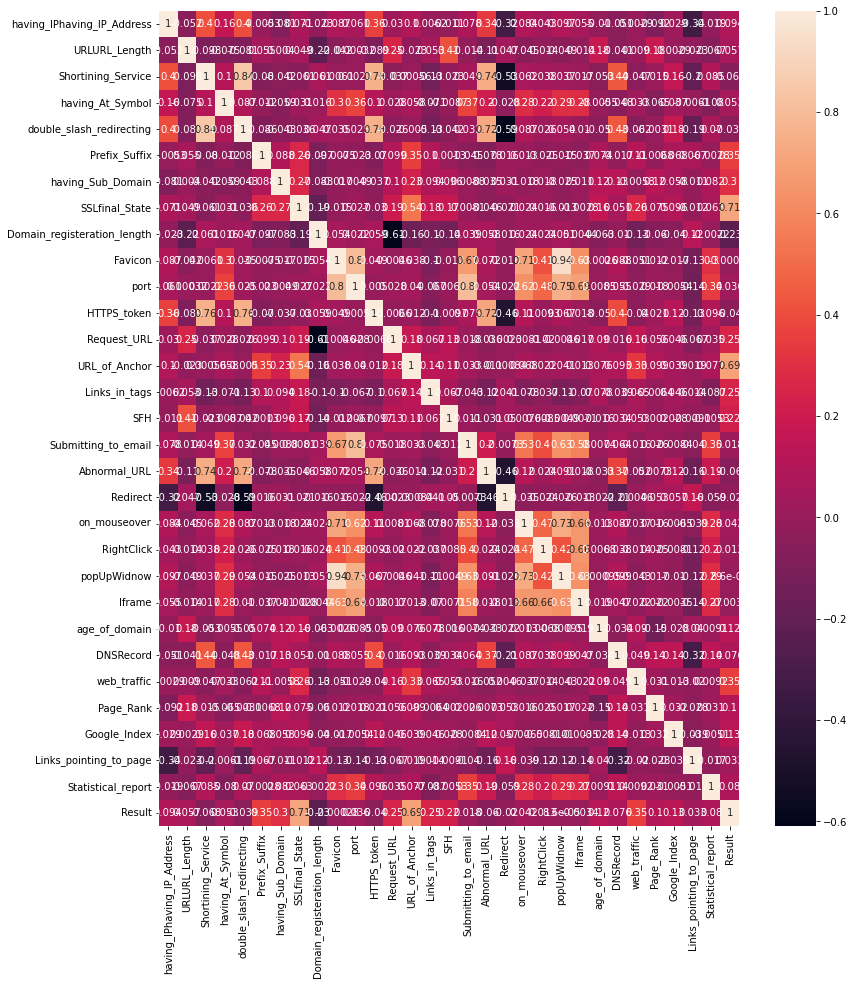

In [14]:
#Correlation heatmap

plt.figure(figsize=(13,15))
sns.heatmap(df.corr(), annot=True)
plt.show()

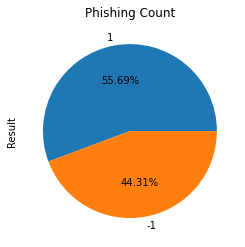

In [15]:
# Phishing Count in pie chart

df['Result'].value_counts().plot(kind='pie',autopct='%1.2f%%')
plt.title("Phishing Count")
plt.show()

# Splitting The Data
# Splitting data into independent and dependent variables

Identifying Independent & dependent variables

In [16]:
# Splitting the dataset into dependant and independant fetature

X = df.drop(["Result"],axis =1)
y = df["Result"]

In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((8844, 30), (8844,), (2211, 30), (2211,))

In [18]:
ML_Model = []
accuracy = []
f1_score = []
recall = []
precision = []

#function to call for storing the results
def storeResults(model, a,b,c,d):
  ML_Model.append(model)
  accuracy.append(round(a, 3))
  f1_score.append(round(b, 3))
  recall.append(round(c, 3))
  precision.append(round(d, 3))

In [19]:
# Linear regression model 
from sklearn.linear_model import LogisticRegression
log = LogisticRegression()

# fit the model 
log.fit(X_train,y_train)

LogisticRegression()

In [20]:
#predicting the target value from the model for the samples

y_train_log = log.predict(X_train)
y_test_log = log.predict(X_test)

In [21]:
#computing the accuracy, f1_score, Recall, precision of the model performance

acc_train_log = metrics.accuracy_score(y_train,y_train_log)
acc_test_log = metrics.accuracy_score(y_test,y_test_log)
print("Logistic Regression : Accuracy on training Data: {:.3f}".format(acc_train_log))
print("Logistic Regression : Accuracy on test Data: {:.3f}".format(acc_test_log))
print()

f1_score_train_log = metrics.f1_score(y_train,y_train_log)
f1_score_test_log = metrics.f1_score(y_test,y_test_log)
print("Logistic Regression : f1_score on training df: {:.3f}".format(f1_score_train_log))
print("Logistic Regression : f1_score on test df: {:.3f}".format(f1_score_test_log))
print()

recall_score_train_log = metrics.recall_score(y_train,y_train_log)
recall_score_test_log = metrics.recall_score(y_test,y_test_log)
print("Logistic Regression : Recall on training df: {:.3f}".format(recall_score_train_log))
print("Logistic Regression : Recall on test df: {:.3f}".format(recall_score_test_log))
print()

precision_score_train_log = metrics.precision_score(y_train,y_train_log)
precision_score_test_log = metrics.precision_score(y_test,y_test_log)
print("Logistic Regression : precision on training df: {:.3f}".format(precision_score_train_log))
print("Logistic Regression : precision on test df: {:.3f}".format(precision_score_test_log))

Logistic Regression : Accuracy on training Data: 0.929
Logistic Regression : Accuracy on test Data: 0.924

Logistic Regression : f1_score on training df: 0.937
Logistic Regression : f1_score on test df: 0.933

Logistic Regression : Recall on training df: 0.947
Logistic Regression : Recall on test df: 0.939

Logistic Regression : precision on training df: 0.927
Logistic Regression : precision on test df: 0.928


In [22]:
#computing the classification report of the model

print(metrics.classification_report(y_test, y_test_log))

              precision    recall  f1-score   support

          -1       0.92      0.90      0.91       956
           1       0.93      0.94      0.93      1255

    accuracy                           0.92      2211
   macro avg       0.92      0.92      0.92      2211
weighted avg       0.92      0.92      0.92      2211



In [23]:
#storing the results. The below mentioned order of parameter passing is important.

storeResults('Logistic Regression',acc_test_log,f1_score_test_log,
             recall_score_train_log,precision_score_train_log)

K-NEAREST NEIGHBOR

In [24]:
# K-Nearest Neighbors Classifier model
from sklearn.neighbors import KNeighborsClassifier

# instantiate the model
knn = KNeighborsClassifier(n_neighbors=2)

# fit the model 
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=2)

In [25]:
#predicting the target value from the model for the samples
y_train_knn = knn.predict(X_train)
y_test_knn = knn.predict(X_test)

In [26]:
#computing the accuracy,f1_score,Recall,precision of the model performance

acc_train_knn = metrics.accuracy_score(y_train,y_train_knn)
acc_test_knn = metrics.accuracy_score(y_test,y_test_knn)
print("K-Nearest Neighbors : Accuracy on training df: {:.3f}".format(acc_train_knn))
print("K-Nearest Neighbors : Accuracy on test df: {:.3f}".format(acc_test_knn))
print()

f1_score_train_knn = metrics.f1_score(y_train,y_train_knn)
f1_score_test_knn = metrics.f1_score(y_test,y_test_knn)
print("K-Nearest Neighbors : f1_score on training df: {:.3f}".format(f1_score_train_knn))
print("K-Nearest Neighbors : f1_score on test df: {:.3f}".format(f1_score_test_knn))
print()

recall_score_train_knn = metrics.recall_score(y_train,y_train_knn)
recall_score_test_knn = metrics.recall_score(y_test,y_test_knn)
print("K-Nearest Neighborsn : Recall on training df: {:.3f}".format(recall_score_train_knn))
print("Logistic Regression : Recall on test df: {:.3f}".format(recall_score_test_knn))
print()

precision_score_train_knn = metrics.precision_score(y_train,y_train_knn)
precision_score_test_knn = metrics.precision_score(y_test,y_test_knn)
print("K-Nearest Neighbors : precision on training df: {:.3f}".format(precision_score_train_knn))
print("K-Nearest Neighbors : precision on test df: {:.3f}".format(precision_score_test_knn))

K-Nearest Neighbors : Accuracy on training df: 0.977
K-Nearest Neighbors : Accuracy on test df: 0.944

K-Nearest Neighbors : f1_score on training df: 0.979
K-Nearest Neighbors : f1_score on test df: 0.950

K-Nearest Neighborsn : Recall on training df: 0.962
Logistic Regression : Recall on test df: 0.929

K-Nearest Neighbors : precision on training df: 0.996
K-Nearest Neighbors : precision on test df: 0.971


In [27]:
#computing the classification report of the model

print(metrics.classification_report(y_test, y_test_knn))

              precision    recall  f1-score   support

          -1       0.91      0.96      0.94       956
           1       0.97      0.93      0.95      1255

    accuracy                           0.94      2211
   macro avg       0.94      0.95      0.94      2211
weighted avg       0.95      0.94      0.94      2211



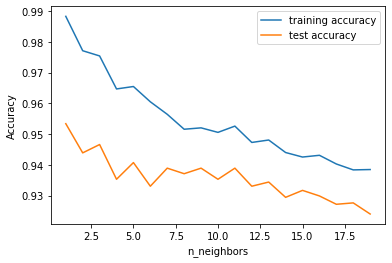

In [28]:
training_accuracy = []
test_accuracy = []
# try max_depth from 1 to 20
depth = range(1,20)
for n in depth:
    knn = KNeighborsClassifier(n_neighbors=n)

    knn.fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(knn.score(X_train, y_train))
    # record generalization accuracy
    test_accuracy.append(knn.score(X_test, y_test))
    

#plotting the training & testing accuracy for n_estimators from 1 to 20
plt.plot(depth, training_accuracy, label="training accuracy")
plt.plot(depth, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")  
plt.xlabel("n_neighbors")
plt.legend();

In [29]:
#storing the results. The below mentioned order of parameter passing is important.

storeResults('K-Nearest Neighbors',acc_test_knn,f1_score_test_knn,
             recall_score_train_knn,precision_score_train_knn)

In [30]:
# Support Vector Classifier model 
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

# defining parameter range
param_grid = {'gamma': [0.1],'kernel': ['rbf','linear']}

svc = GridSearchCV(SVC(), param_grid)

# fitting the model for grid search
svc.fit(X_train, y_train)

GridSearchCV(estimator=SVC(),
             param_grid={'gamma': [0.1], 'kernel': ['rbf', 'linear']})

In [31]:
#predicting the target value from the model for the samples
y_train_svc = svc.predict(X_train)
y_test_svc = svc.predict(X_test)

In [32]:
#computing the accuracy, f1_score, Recall, precision of the model performance

acc_train_svc = metrics.accuracy_score(y_train,y_train_svc)
acc_test_svc = metrics.accuracy_score(y_test,y_test_svc)
print("Support Vector Machine : Accuracy on training df: {:.3f}".format(acc_train_svc))
print("Support Vector Machine : Accuracy on test df: {:.3f}".format(acc_test_svc))
print()

f1_score_train_svc = metrics.f1_score(y_train,y_train_svc)
f1_score_test_svc = metrics.f1_score(y_test,y_test_svc)
print("Support Vector Machine : f1_score on training df: {:.3f}".format(f1_score_train_svc))
print("Support Vector Machine : f1_score on test df: {:.3f}".format(f1_score_test_svc))
print()

recall_score_train_svc = metrics.recall_score(y_train,y_train_svc)
recall_score_test_svc = metrics.recall_score(y_test,y_test_svc)
print("Support Vector Machine : Recall on training df: {:.3f}".format(recall_score_train_svc))
print("Support Vector Machine : Recall on test df: {:.3f}".format(recall_score_test_svc))
print()

precision_score_train_svc = metrics.precision_score(y_train,y_train_svc)
precision_score_test_svc = metrics.precision_score(y_test,y_test_svc)
print("Support Vector Machine : precision on training df: {:.3f}".format(precision_score_train_svc))
print("Support Vector Machine : precision on test df: {:.3f}".format(precision_score_test_svc))

Support Vector Machine : Accuracy on training df: 0.971
Support Vector Machine : Accuracy on test df: 0.957

Support Vector Machine : f1_score on training df: 0.974
Support Vector Machine : f1_score on test df: 0.963

Support Vector Machine : Recall on training df: 0.982
Support Vector Machine : Recall on test df: 0.973

Support Vector Machine : precision on training df: 0.966
Support Vector Machine : precision on test df: 0.952


In [33]:
#computing the classification report of the model

print(metrics.classification_report(y_test, y_test_svc))

              precision    recall  f1-score   support

          -1       0.96      0.94      0.95       956
           1       0.95      0.97      0.96      1255

    accuracy                           0.96      2211
   macro avg       0.96      0.95      0.96      2211
weighted avg       0.96      0.96      0.96      2211



In [34]:
#computing the classification report of the model

print(metrics.classification_report(y_test, y_test_svc))

              precision    recall  f1-score   support

          -1       0.96      0.94      0.95       956
           1       0.95      0.97      0.96      1255

    accuracy                           0.96      2211
   macro avg       0.96      0.95      0.96      2211
weighted avg       0.96      0.96      0.96      2211



In [35]:
# Naive Bayes Classifier Model
from sklearn.naive_bayes import GaussianNB
from sklearn.pipeline import Pipeline

# instantiate the model
nb=  GaussianNB()

# fit the model 
nb.fit(X_train,y_train)

GaussianNB()

In [36]:
#predicting the target value from the model for the samples
y_train_nb = nb.predict(X_train)
y_test_nb = nb.predict(X_test)

In [37]:
#computing the accuracy, f1_score, Recall, precision of the model performance

acc_train_nb = metrics.accuracy_score(y_train,y_train_nb)
acc_test_nb = metrics.accuracy_score(y_test,y_test_nb)
print("Naive Bayes Classifier : Accuracy on training df: {:.3f}".format(acc_train_nb))
print("Naive Bayes Classifier : Accuracy on test df: {:.3f}".format(acc_test_nb))
print()

f1_score_train_nb = metrics.f1_score(y_train,y_train_nb)
f1_score_test_nb = metrics.f1_score(y_test,y_test_nb)
print("Naive Bayes Classifier : f1_score on training df: {:.3f}".format(f1_score_train_nb))
print("Naive Bayes Classifier : f1_score on test df: {:.3f}".format(f1_score_test_nb))
print()

recall_score_train_nb = metrics.recall_score(y_train,y_train_nb)
recall_score_test_nb = metrics.recall_score(y_test,y_test_nb)
print("Naive Bayes Classifier : Recall on training df: {:.3f}".format(recall_score_train_nb))
print("Naive Bayes Classifier : Recall on test df: {:.3f}".format(recall_score_test_nb))
print()

precision_score_train_nb = metrics.precision_score(y_train,y_train_nb)
precision_score_test_nb = metrics.precision_score(y_test,y_test_nb)
print("Naive Bayes Classifier : precision on training df: {:.3f}".format(precision_score_train_nb))
print("Naive Bayes Classifier : precision on test df: {:.3f}".format(precision_score_test_nb))

Naive Bayes Classifier : Accuracy on training df: 0.607
Naive Bayes Classifier : Accuracy on test df: 0.583

Naive Bayes Classifier : f1_score on training df: 0.451
Naive Bayes Classifier : f1_score on test df: 0.420

Naive Bayes Classifier : Recall on training df: 0.291
Naive Bayes Classifier : Recall on test df: 0.266

Naive Bayes Classifier : precision on training df: 0.996
Naive Bayes Classifier : precision on test df: 0.997


In [38]:
#computing the classification report of the model

print(metrics.classification_report(y_test, y_test_svc))

              precision    recall  f1-score   support

          -1       0.96      0.94      0.95       956
           1       0.95      0.97      0.96      1255

    accuracy                           0.96      2211
   macro avg       0.96      0.95      0.96      2211
weighted avg       0.96      0.96      0.96      2211



In [39]:
#storing the results. The below mentioned order of parameter passing is important.

storeResults('Naive Bayes Classifier',acc_test_nb,f1_score_test_nb,
             recall_score_train_nb,precision_score_train_nb)

In [40]:
# Decision Tree Classifier model 
from sklearn.tree import DecisionTreeClassifier

# instantiate the model 
tree = DecisionTreeClassifier(max_depth=30)

# fit the model 
tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=30)

In [41]:
#predicting the target value from the model for the samples

y_train_tree = tree.predict(X_train)
y_test_tree = tree.predict(X_test)

In [42]:
#computing the accuracy, f1_score, Recall, precision of the model performance

acc_train_tree = metrics.accuracy_score(y_train,y_train_tree)
acc_test_tree = metrics.accuracy_score(y_test,y_test_tree)
print("Decision Tree : Accuracy on training df: {:.3f}".format(acc_train_tree))
print("Decision Tree : Accuracy on test df: {:.3f}".format(acc_test_tree))
print()

f1_score_train_tree = metrics.f1_score(y_train,y_train_tree)
f1_score_test_tree = metrics.f1_score(y_test,y_test_tree)
print("Decision Tree : f1_score on training df: {:.3f}".format(f1_score_train_tree))
print("Decision Tree : f1_score on test df: {:.3f}".format(f1_score_test_tree))
print()

recall_score_train_tree = metrics.recall_score(y_train,y_train_tree)
recall_score_test_tree = metrics.recall_score(y_test,y_test_tree)
print("Decision Tree : Recall on training df: {:.3f}".format(recall_score_train_tree))
print("Decision Tree : Recall on test df: {:.3f}".format(recall_score_test_tree))
print()

precision_score_train_tree = metrics.precision_score(y_train,y_train_tree)
precision_score_test_tree = metrics.precision_score(y_test,y_test_tree)
print("Decision Tree : precision on training df: {:.3f}".format(precision_score_train_tree))
print("Decision Tree : precision on test df: {:.3f}".format(precision_score_test_tree))

Decision Tree : Accuracy on training df: 0.991
Decision Tree : Accuracy on test df: 0.960

Decision Tree : f1_score on training df: 0.992
Decision Tree : f1_score on test df: 0.965

Decision Tree : Recall on training df: 0.992
Decision Tree : Recall on test df: 0.966

Decision Tree : precision on training df: 0.991
Decision Tree : precision on test df: 0.963


In [43]:
#computing the classification report of the model

print(metrics.classification_report(y_test, y_test_tree))

              precision    recall  f1-score   support

          -1       0.95      0.95      0.95       956
           1       0.96      0.97      0.96      1255

    accuracy                           0.96      2211
   macro avg       0.96      0.96      0.96      2211
weighted avg       0.96      0.96      0.96      2211



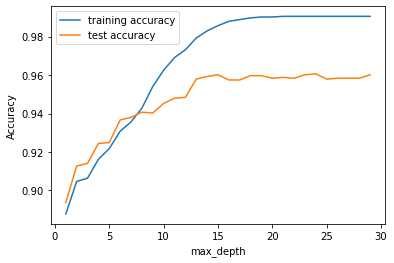

In [44]:
training_accuracy = []
test_accuracy = []
# try max_depth from 1 to 30
depth = range(1,30)
for n in depth:
    tree_test = DecisionTreeClassifier(max_depth=n)

    tree_test.fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(tree_test.score(X_train, y_train))
    # record generalization accuracy
    test_accuracy.append(tree_test.score(X_test, y_test))
    

#plotting the training & testing accuracy for max_depth from 1 to 30
plt.plot(depth, training_accuracy, label="training accuracy")
plt.plot(depth, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")  
plt.xlabel("max_depth")
plt.legend();

In [45]:
#storing the results. The below mentioned order of parameter passing is important.

storeResults('Decision Tree',acc_test_tree,f1_score_test_tree,
             recall_score_train_tree,precision_score_train_tree)

In [46]:
# Random Forest Classifier Model
from sklearn.ensemble import RandomForestClassifier

# instantiate the model
forest = RandomForestClassifier(n_estimators=10)

# fit the model 
forest.fit(X_train,y_train)

RandomForestClassifier(n_estimators=10)

In [47]:
#predicting the target value from the model for the samples
y_train_forest = forest.predict(X_train)
y_test_forest = forest.predict(X_test)

In [48]:
#computing the accuracy, f1_score, Recall, precision of the model performance

acc_train_forest = metrics.accuracy_score(y_train,y_train_forest)
acc_test_forest = metrics.accuracy_score(y_test,y_test_forest)
print("Random Forest : Accuracy on training Data: {:.3f}".format(acc_train_forest))
print("Random Forest : Accuracy on test Data: {:.3f}".format(acc_test_forest))
print()

f1_score_train_forest = metrics.f1_score(y_train,y_train_forest)
f1_score_test_forest = metrics.f1_score(y_test,y_test_forest)
print("Random Forest : f1_score on training Data: {:.3f}".format(f1_score_train_forest))
print("Random Forest : f1_score on test Data: {:.3f}".format(f1_score_test_forest))
print()

recall_score_train_forest = metrics.recall_score(y_train,y_train_forest)
recall_score_test_forest = metrics.recall_score(y_test,y_test_forest)
print("Random Forest : Recall on training Data: {:.3f}".format(recall_score_train_forest))
print("Random Forest : Recall on test Data: {:.3f}".format(recall_score_test_forest))
print()

precision_score_train_forest = metrics.precision_score(y_train,y_train_forest)
precision_score_test_forest = metrics.precision_score(y_test,y_test_tree)
print("Random Forest : precision on training Data: {:.3f}".format(precision_score_train_forest))
print("Random Forest : precision on test Data: {:.3f}".format(precision_score_test_forest))

Random Forest : Accuracy on training Data: 0.990
Random Forest : Accuracy on test Data: 0.969

Random Forest : f1_score on training Data: 0.991
Random Forest : f1_score on test Data: 0.973

Random Forest : Recall on training Data: 0.995
Random Forest : Recall on test Data: 0.979

Random Forest : precision on training Data: 0.987
Random Forest : precision on test Data: 0.963


In [49]:
#computing the classification report of the model

print(metrics.classification_report(y_test, y_test_forest))

              precision    recall  f1-score   support

          -1       0.97      0.96      0.96       956
           1       0.97      0.98      0.97      1255

    accuracy                           0.97      2211
   macro avg       0.97      0.97      0.97      2211
weighted avg       0.97      0.97      0.97      2211



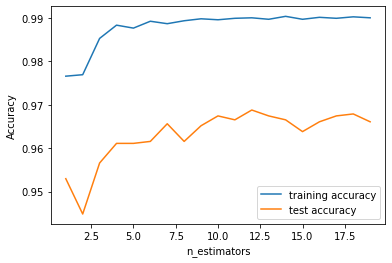

In [50]:
training_accuracy = []
test_accuracy = []
# try max_depth from 1 to 20
depth = range(1,20)
for n in depth:
    forest_test =  RandomForestClassifier(n_estimators=n)

    forest_test.fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(forest_test.score(X_train, y_train))
    # record generalization accuracy
    test_accuracy.append(forest_test.score(X_test, y_test))
    

#plotting the training & testing accuracy for n_estimators from 1 to 20
plt.figure(figsize=None)
plt.plot(depth, training_accuracy, label="training accuracy")
plt.plot(depth, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")  
plt.xlabel("n_estimators")
plt.legend();

In [51]:
#storing the results. The below mentioned order of parameter passing is important.

storeResults('Random Forest',acc_test_forest,f1_score_test_forest,
             recall_score_train_forest,precision_score_train_forest)

In [52]:
# Gradient Boosting Classifier Model
from sklearn.ensemble import GradientBoostingClassifier

# instantiate the model
gbc = GradientBoostingClassifier(max_depth=4,learning_rate=0.7)

# fit the model 
gbc.fit(X_train,y_train)

GradientBoostingClassifier(learning_rate=0.7, max_depth=4)

In [53]:
#predicting the target value from the model for the samples
y_train_gbc = gbc.predict(X_train)
y_test_gbc = gbc.predict(X_test)

In [54]:
#computing the accuracy, f1_score, Recall, precision of the model performance

acc_train_gbc = metrics.accuracy_score(y_train,y_train_gbc)
acc_test_gbc = metrics.accuracy_score(y_test,y_test_gbc)
print("Gradient Boosting Classifier : Accuracy on training Data: {:.3f}".format(acc_train_gbc))
print("Gradient Boosting Classifier : Accuracy on test Data: {:.3f}".format(acc_test_gbc))
print()

f1_score_train_gbc = metrics.f1_score(y_train,y_train_gbc)
f1_score_test_gbc = metrics.f1_score(y_test,y_test_gbc)
print("Gradient Boosting Classifier : f1_score on training Data: {:.3f}".format(f1_score_train_gbc))
print("Gradient Boosting Classifier : f1_score on test Data: {:.3f}".format(f1_score_test_gbc))
print()

recall_score_train_gbc = metrics.recall_score(y_train,y_train_gbc)
recall_score_test_gbc =  metrics.recall_score(y_test,y_test_gbc)
print("Gradient Boosting Classifier : Recall on training Data: {:.3f}".format(recall_score_train_gbc))
print("Gradient Boosting Classifier : Recall on test Data: {:.3f}".format(recall_score_test_gbc))
print()

precision_score_train_gbc = metrics.precision_score(y_train,y_train_gbc)
precision_score_test_gbc = metrics.precision_score(y_test,y_test_gbc)
print("Gradient Boosting Classifier : precision on training Data: {:.3f}".format(precision_score_train_gbc))
print("Gradient Boosting Classifier : precision on test Data: {:.3f}".format(precision_score_test_gbc))

Gradient Boosting Classifier : Accuracy on training Data: 0.987
Gradient Boosting Classifier : Accuracy on test Data: 0.971

Gradient Boosting Classifier : f1_score on training Data: 0.989
Gradient Boosting Classifier : f1_score on test Data: 0.975

Gradient Boosting Classifier : Recall on training Data: 0.992
Gradient Boosting Classifier : Recall on test Data: 0.988

Gradient Boosting Classifier : precision on training Data: 0.985
Gradient Boosting Classifier : precision on test Data: 0.962


In [55]:
#computing the classification report of the model

print(metrics.classification_report(y_test, y_test_gbc))

              precision    recall  f1-score   support

          -1       0.98      0.95      0.97       956
           1       0.96      0.99      0.97      1255

    accuracy                           0.97      2211
   macro avg       0.97      0.97      0.97      2211
weighted avg       0.97      0.97      0.97      2211



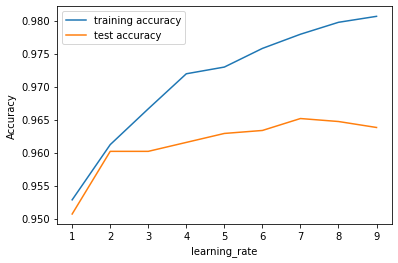

In [56]:
training_accuracy = []
test_accuracy = []
# try learning_rate from 0.1 to 0.9
depth = range(1,10)
for n in depth:
    forest_test =  GradientBoostingClassifier(learning_rate = n*0.1)

    forest_test.fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(forest_test.score(X_train, y_train))
    # record generalization accuracy
    test_accuracy.append(forest_test.score(X_test, y_test))
    

#plotting the training & testing accuracy for n_estimators from 1 to 50
plt.figure(figsize=None)
plt.plot(depth, training_accuracy, label="training accuracy")
plt.plot(depth, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")  
plt.xlabel("learning_rate")
plt.legend();

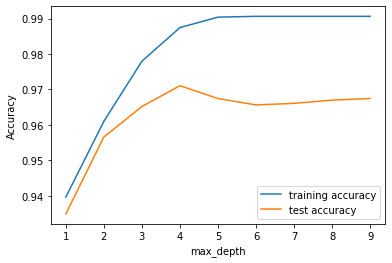

In [57]:
training_accuracy = []
test_accuracy = []
# try learning_rate from 0.1 to 0.9
depth = range(1,10,1)
for n in depth:
    forest_test =  GradientBoostingClassifier(max_depth=n,learning_rate = 0.7)

    forest_test.fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(forest_test.score(X_train, y_train))
    # record generalization accuracy
    test_accuracy.append(forest_test.score(X_test, y_test))
    

#plotting the training & testing accuracy for n_estimators from 1 to 50
plt.figure(figsize=None)
plt.plot(depth, training_accuracy, label="training accuracy")
plt.plot(depth, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")  
plt.xlabel("max_depth")
plt.legend();

In [58]:
#storing the results. The below mentioned order of parameter passing is important.

storeResults('Gradient Boosting Classifier',acc_test_gbc,f1_score_test_gbc,
             recall_score_train_gbc,precision_score_train_gbc)

In [59]:
pip install catboost

     |████████████████████████████████| 76.6 MB 248 kB/s  eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [60]:
#  catboost Classifier Model
from catboost import CatBoostClassifier

# instantiate the model
cat = CatBoostClassifier(learning_rate  = 0.1)

# fit the model 
cat.fit(X_train,y_train)

0:	learn: 0.5480538	total: 48.7ms	remaining: 48.7s
1:	learn: 0.4337748	total: 52.1ms	remaining: 26s
2:	learn: 0.3697514	total: 55.2ms	remaining: 18.4s
3:	learn: 0.3105084	total: 58.1ms	remaining: 14.5s
4:	learn: 0.2715007	total: 60.9ms	remaining: 12.1s
5:	learn: 0.2433223	total: 63.9ms	remaining: 10.6s
6:	learn: 0.2254893	total: 66.9ms	remaining: 9.49s
7:	learn: 0.2082963	total: 69.8ms	remaining: 8.65s
8:	learn: 0.1975992	total: 72.6ms	remaining: 7.99s
9:	learn: 0.1868770	total: 75.5ms	remaining: 7.47s
10:	learn: 0.1795134	total: 78.5ms	remaining: 7.05s
11:	learn: 0.1749100	total: 81.5ms	remaining: 6.71s
12:	learn: 0.1685586	total: 84.8ms	remaining: 6.44s
13:	learn: 0.1642018	total: 88ms	remaining: 6.19s
14:	learn: 0.1599999	total: 90.9ms	remaining: 5.97s
15:	learn: 0.1563166	total: 93.8ms	remaining: 5.77s
16:	learn: 0.1538434	total: 96.6ms	remaining: 5.59s
17:	learn: 0.1515084	total: 99.5ms	remaining: 5.43s
18:	learn: 0.1476302	total: 103ms	remaining: 5.29s
19:	learn: 0.1453111	total:

164:	learn: 0.0554499	total: 534ms	remaining: 2.7s
165:	learn: 0.0552243	total: 537ms	remaining: 2.7s
166:	learn: 0.0550103	total: 540ms	remaining: 2.69s
167:	learn: 0.0548806	total: 543ms	remaining: 2.69s
168:	learn: 0.0546207	total: 546ms	remaining: 2.68s
169:	learn: 0.0544744	total: 549ms	remaining: 2.68s
170:	learn: 0.0542500	total: 552ms	remaining: 2.67s
171:	learn: 0.0540693	total: 555ms	remaining: 2.67s
172:	learn: 0.0538623	total: 558ms	remaining: 2.67s
173:	learn: 0.0537364	total: 560ms	remaining: 2.66s
174:	learn: 0.0536432	total: 563ms	remaining: 2.65s
175:	learn: 0.0534786	total: 566ms	remaining: 2.65s
176:	learn: 0.0532180	total: 569ms	remaining: 2.65s
177:	learn: 0.0528518	total: 572ms	remaining: 2.64s
178:	learn: 0.0526563	total: 575ms	remaining: 2.64s
179:	learn: 0.0525527	total: 578ms	remaining: 2.63s
180:	learn: 0.0524322	total: 581ms	remaining: 2.63s
181:	learn: 0.0522636	total: 584ms	remaining: 2.62s
182:	learn: 0.0521263	total: 587ms	remaining: 2.62s
183:	learn: 0.

331:	learn: 0.0366011	total: 1.02s	remaining: 2.06s
332:	learn: 0.0365440	total: 1.02s	remaining: 2.05s
333:	learn: 0.0364772	total: 1.03s	remaining: 2.05s
334:	learn: 0.0364198	total: 1.03s	remaining: 2.05s
335:	learn: 0.0363342	total: 1.03s	remaining: 2.04s
336:	learn: 0.0363020	total: 1.04s	remaining: 2.04s
337:	learn: 0.0362744	total: 1.04s	remaining: 2.04s
338:	learn: 0.0362406	total: 1.04s	remaining: 2.03s
339:	learn: 0.0361790	total: 1.05s	remaining: 2.03s
340:	learn: 0.0361567	total: 1.05s	remaining: 2.03s
341:	learn: 0.0360659	total: 1.05s	remaining: 2.03s
342:	learn: 0.0359730	total: 1.06s	remaining: 2.02s
343:	learn: 0.0359125	total: 1.06s	remaining: 2.02s
344:	learn: 0.0357884	total: 1.06s	remaining: 2.02s
345:	learn: 0.0357374	total: 1.06s	remaining: 2.01s
346:	learn: 0.0356667	total: 1.07s	remaining: 2.01s
347:	learn: 0.0356343	total: 1.07s	remaining: 2.01s
348:	learn: 0.0355608	total: 1.07s	remaining: 2s
349:	learn: 0.0354919	total: 1.08s	remaining: 2s
350:	learn: 0.0354

500:	learn: 0.0298840	total: 1.51s	remaining: 1.5s
501:	learn: 0.0298840	total: 1.51s	remaining: 1.5s
502:	learn: 0.0298839	total: 1.51s	remaining: 1.5s
503:	learn: 0.0298839	total: 1.52s	remaining: 1.49s
504:	learn: 0.0298839	total: 1.52s	remaining: 1.49s
505:	learn: 0.0298837	total: 1.52s	remaining: 1.49s
506:	learn: 0.0298834	total: 1.52s	remaining: 1.48s
507:	learn: 0.0298578	total: 1.53s	remaining: 1.48s
508:	learn: 0.0298259	total: 1.53s	remaining: 1.48s
509:	learn: 0.0297820	total: 1.53s	remaining: 1.47s
510:	learn: 0.0297506	total: 1.54s	remaining: 1.47s
511:	learn: 0.0297180	total: 1.54s	remaining: 1.47s
512:	learn: 0.0297023	total: 1.54s	remaining: 1.47s
513:	learn: 0.0296822	total: 1.55s	remaining: 1.46s
514:	learn: 0.0296583	total: 1.55s	remaining: 1.46s
515:	learn: 0.0296388	total: 1.55s	remaining: 1.46s
516:	learn: 0.0296388	total: 1.55s	remaining: 1.45s
517:	learn: 0.0296362	total: 1.56s	remaining: 1.45s
518:	learn: 0.0295984	total: 1.56s	remaining: 1.45s
519:	learn: 0.0

677:	learn: 0.0274060	total: 2s	remaining: 949ms
678:	learn: 0.0273806	total: 2s	remaining: 946ms
679:	learn: 0.0273805	total: 2s	remaining: 943ms
680:	learn: 0.0273805	total: 2s	remaining: 940ms
681:	learn: 0.0273628	total: 2.01s	remaining: 937ms
682:	learn: 0.0273477	total: 2.01s	remaining: 934ms
683:	learn: 0.0273472	total: 2.01s	remaining: 931ms
684:	learn: 0.0273472	total: 2.02s	remaining: 928ms
685:	learn: 0.0273472	total: 2.02s	remaining: 925ms
686:	learn: 0.0273472	total: 2.02s	remaining: 922ms
687:	learn: 0.0273318	total: 2.03s	remaining: 919ms
688:	learn: 0.0273317	total: 2.03s	remaining: 916ms
689:	learn: 0.0273317	total: 2.03s	remaining: 913ms
690:	learn: 0.0273316	total: 2.03s	remaining: 910ms
691:	learn: 0.0273316	total: 2.04s	remaining: 907ms
692:	learn: 0.0273293	total: 2.04s	remaining: 903ms
693:	learn: 0.0272748	total: 2.04s	remaining: 900ms
694:	learn: 0.0272560	total: 2.04s	remaining: 898ms
695:	learn: 0.0272354	total: 2.05s	remaining: 895ms
696:	learn: 0.0272354	to

858:	learn: 0.0262433	total: 2.48s	remaining: 407ms
859:	learn: 0.0262433	total: 2.48s	remaining: 404ms
860:	learn: 0.0262432	total: 2.48s	remaining: 401ms
861:	learn: 0.0262432	total: 2.49s	remaining: 398ms
862:	learn: 0.0262431	total: 2.49s	remaining: 395ms
863:	learn: 0.0262431	total: 2.49s	remaining: 392ms
864:	learn: 0.0262431	total: 2.5s	remaining: 389ms
865:	learn: 0.0262431	total: 2.5s	remaining: 387ms
866:	learn: 0.0262431	total: 2.5s	remaining: 384ms
867:	learn: 0.0262430	total: 2.5s	remaining: 381ms
868:	learn: 0.0262430	total: 2.5s	remaining: 378ms
869:	learn: 0.0262429	total: 2.51s	remaining: 375ms
870:	learn: 0.0262429	total: 2.51s	remaining: 372ms
871:	learn: 0.0262429	total: 2.51s	remaining: 369ms
872:	learn: 0.0262428	total: 2.52s	remaining: 366ms
873:	learn: 0.0262428	total: 2.52s	remaining: 363ms
874:	learn: 0.0262427	total: 2.52s	remaining: 360ms
875:	learn: 0.0262427	total: 2.52s	remaining: 357ms
876:	learn: 0.0262424	total: 2.52s	remaining: 354ms
877:	learn: 0.026

In [61]:
#predicting the target value from the model for the samples
y_train_cat = cat.predict(X_train)
y_test_cat = cat.predict(X_test)

In [62]:
#computing the accuracy, f1_score, Recall, precision of the model performance

acc_train_cat  = metrics.accuracy_score(y_train,y_train_cat)
acc_test_cat = metrics.accuracy_score(y_test,y_test_cat)
print("CatBoost Classifier : Accuracy on training Data: {:.3f}".format(acc_train_cat))
print("CatBoost Classifier : Accuracy on test Data: {:.3f}".format(acc_test_cat))
print()

f1_score_train_cat = metrics.f1_score(y_train,y_train_cat)
f1_score_test_cat = metrics.f1_score(y_test,y_test_cat)
print("CatBoost Classifier : f1_score on training Data: {:.3f}".format(f1_score_train_cat))
print("CatBoost Classifier : f1_score on test Data: {:.3f}".format(f1_score_test_cat))
print()

recall_score_train_cat = metrics.recall_score(y_train,y_train_cat)
recall_score_test_cat = metrics.recall_score(y_test,y_test_cat)
print("CatBoost Classifier : Recall on training Data: {:.3f}".format(recall_score_train_cat))
print("CatBoost Classifier : Recall on test Data: {:.3f}".format(recall_score_test_cat))
print()

precision_score_train_cat = metrics.precision_score(y_train,y_train_cat)
precision_score_test_cat = metrics.precision_score(y_test,y_test_cat)
print("CatBoost Classifier : precision on training Data: {:.3f}".format(precision_score_train_cat))
print("CatBoost Classifier : precision on test Data: {:.3f}".format(precision_score_test_cat))

CatBoost Classifier : Accuracy on training Data: 0.990
CatBoost Classifier : Accuracy on test Data: 0.972

CatBoost Classifier : f1_score on training Data: 0.991
CatBoost Classifier : f1_score on test Data: 0.976

CatBoost Classifier : Recall on training Data: 0.994
CatBoost Classifier : Recall on test Data: 0.988

CatBoost Classifier : precision on training Data: 0.987
CatBoost Classifier : precision on test Data: 0.964


In [63]:
#computing the classification report of the model

print(metrics.classification_report(y_test, y_test_cat))

              precision    recall  f1-score   support

          -1       0.98      0.95      0.97       956
           1       0.96      0.99      0.98      1255

    accuracy                           0.97      2211
   macro avg       0.97      0.97      0.97      2211
weighted avg       0.97      0.97      0.97      2211



In [64]:
training_accuracy = []
test_accuracy = []
# try learning_rate from 0.1 to 0.9
depth = range(1,10)
for n in depth:
    forest_test =  CatBoostClassifier(learning_rate = n*0.1)

    forest_test.fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(forest_test.score(X_train, y_train))
    # record generalization accuracy
    test_accuracy.append(forest_test.score(X_test, y_test))

0:	learn: 0.5480538	total: 2.36ms	remaining: 2.35s
1:	learn: 0.4337748	total: 5.18ms	remaining: 2.58s
2:	learn: 0.3697514	total: 8.41ms	remaining: 2.79s
3:	learn: 0.3105084	total: 11.3ms	remaining: 2.8s
4:	learn: 0.2715007	total: 14.1ms	remaining: 2.81s
5:	learn: 0.2433223	total: 17.1ms	remaining: 2.83s
6:	learn: 0.2254893	total: 20ms	remaining: 2.83s
7:	learn: 0.2082963	total: 22.8ms	remaining: 2.83s
8:	learn: 0.1975992	total: 26.1ms	remaining: 2.87s
9:	learn: 0.1868770	total: 29ms	remaining: 2.87s
10:	learn: 0.1795134	total: 32.1ms	remaining: 2.89s
11:	learn: 0.1749100	total: 35.1ms	remaining: 2.89s
12:	learn: 0.1685586	total: 38ms	remaining: 2.88s
13:	learn: 0.1642018	total: 41ms	remaining: 2.89s
14:	learn: 0.1599999	total: 44.8ms	remaining: 2.94s
15:	learn: 0.1563166	total: 48.6ms	remaining: 2.99s
16:	learn: 0.1538434	total: 51.5ms	remaining: 2.98s
17:	learn: 0.1515084	total: 54.4ms	remaining: 2.97s
18:	learn: 0.1476302	total: 57.3ms	remaining: 2.96s
19:	learn: 0.1453111	total: 60.

183:	learn: 0.0520370	total: 546ms	remaining: 2.42s
184:	learn: 0.0518513	total: 549ms	remaining: 2.42s
185:	learn: 0.0517435	total: 552ms	remaining: 2.41s
186:	learn: 0.0516027	total: 555ms	remaining: 2.41s
187:	learn: 0.0515528	total: 557ms	remaining: 2.41s
188:	learn: 0.0514329	total: 560ms	remaining: 2.4s
189:	learn: 0.0512730	total: 563ms	remaining: 2.4s
190:	learn: 0.0510363	total: 567ms	remaining: 2.4s
191:	learn: 0.0507992	total: 569ms	remaining: 2.4s
192:	learn: 0.0507433	total: 572ms	remaining: 2.39s
193:	learn: 0.0504642	total: 575ms	remaining: 2.39s
194:	learn: 0.0502657	total: 578ms	remaining: 2.39s
195:	learn: 0.0501936	total: 581ms	remaining: 2.38s
196:	learn: 0.0501112	total: 584ms	remaining: 2.38s
197:	learn: 0.0499960	total: 587ms	remaining: 2.38s
198:	learn: 0.0498892	total: 590ms	remaining: 2.37s
199:	learn: 0.0496267	total: 593ms	remaining: 2.37s
200:	learn: 0.0496104	total: 595ms	remaining: 2.37s
201:	learn: 0.0494922	total: 598ms	remaining: 2.36s
202:	learn: 0.04

382:	learn: 0.0336240	total: 1.13s	remaining: 1.82s
383:	learn: 0.0335985	total: 1.13s	remaining: 1.82s
384:	learn: 0.0335471	total: 1.14s	remaining: 1.81s
385:	learn: 0.0335055	total: 1.14s	remaining: 1.81s
386:	learn: 0.0334634	total: 1.14s	remaining: 1.81s
387:	learn: 0.0334000	total: 1.15s	remaining: 1.81s
388:	learn: 0.0333488	total: 1.15s	remaining: 1.8s
389:	learn: 0.0333199	total: 1.15s	remaining: 1.8s
390:	learn: 0.0332703	total: 1.15s	remaining: 1.8s
391:	learn: 0.0332488	total: 1.16s	remaining: 1.79s
392:	learn: 0.0331993	total: 1.16s	remaining: 1.79s
393:	learn: 0.0331993	total: 1.16s	remaining: 1.79s
394:	learn: 0.0331731	total: 1.17s	remaining: 1.78s
395:	learn: 0.0331152	total: 1.17s	remaining: 1.78s
396:	learn: 0.0330834	total: 1.17s	remaining: 1.78s
397:	learn: 0.0330138	total: 1.17s	remaining: 1.78s
398:	learn: 0.0329421	total: 1.18s	remaining: 1.77s
399:	learn: 0.0329113	total: 1.18s	remaining: 1.77s
400:	learn: 0.0328678	total: 1.18s	remaining: 1.77s
401:	learn: 0.0

586:	learn: 0.0282644	total: 1.72s	remaining: 1.21s
587:	learn: 0.0282644	total: 1.72s	remaining: 1.2s
588:	learn: 0.0282644	total: 1.72s	remaining: 1.2s
589:	learn: 0.0282644	total: 1.72s	remaining: 1.2s
590:	learn: 0.0282644	total: 1.73s	remaining: 1.19s
591:	learn: 0.0282644	total: 1.73s	remaining: 1.19s
592:	learn: 0.0282644	total: 1.73s	remaining: 1.19s
593:	learn: 0.0282644	total: 1.73s	remaining: 1.19s
594:	learn: 0.0282644	total: 1.74s	remaining: 1.18s
595:	learn: 0.0282644	total: 1.74s	remaining: 1.18s
596:	learn: 0.0282644	total: 1.74s	remaining: 1.18s
597:	learn: 0.0282644	total: 1.74s	remaining: 1.17s
598:	learn: 0.0282644	total: 1.75s	remaining: 1.17s
599:	learn: 0.0282644	total: 1.75s	remaining: 1.17s
600:	learn: 0.0282644	total: 1.75s	remaining: 1.16s
601:	learn: 0.0282644	total: 1.75s	remaining: 1.16s
602:	learn: 0.0282644	total: 1.76s	remaining: 1.16s
603:	learn: 0.0282644	total: 1.76s	remaining: 1.15s
604:	learn: 0.0282644	total: 1.76s	remaining: 1.15s
605:	learn: 0.0

746:	learn: 0.0269243	total: 2.15s	remaining: 727ms
747:	learn: 0.0269243	total: 2.15s	remaining: 724ms
748:	learn: 0.0269243	total: 2.15s	remaining: 721ms
749:	learn: 0.0269243	total: 2.15s	remaining: 718ms
750:	learn: 0.0269243	total: 2.16s	remaining: 715ms
751:	learn: 0.0269242	total: 2.16s	remaining: 712ms
752:	learn: 0.0269241	total: 2.16s	remaining: 709ms
753:	learn: 0.0269242	total: 2.16s	remaining: 706ms
754:	learn: 0.0269242	total: 2.17s	remaining: 703ms
755:	learn: 0.0269241	total: 2.17s	remaining: 700ms
756:	learn: 0.0269241	total: 2.17s	remaining: 698ms
757:	learn: 0.0269198	total: 2.17s	remaining: 695ms
758:	learn: 0.0268982	total: 2.18s	remaining: 692ms
759:	learn: 0.0268913	total: 2.18s	remaining: 689ms
760:	learn: 0.0268725	total: 2.18s	remaining: 686ms
761:	learn: 0.0268379	total: 2.19s	remaining: 683ms
762:	learn: 0.0268379	total: 2.19s	remaining: 680ms
763:	learn: 0.0268377	total: 2.19s	remaining: 677ms
764:	learn: 0.0268378	total: 2.19s	remaining: 674ms
765:	learn: 

950:	learn: 0.0260265	total: 2.68s	remaining: 138ms
951:	learn: 0.0260264	total: 2.69s	remaining: 135ms
952:	learn: 0.0260264	total: 2.69s	remaining: 133ms
953:	learn: 0.0260265	total: 2.69s	remaining: 130ms
954:	learn: 0.0260264	total: 2.69s	remaining: 127ms
955:	learn: 0.0260264	total: 2.69s	remaining: 124ms
956:	learn: 0.0260264	total: 2.7s	remaining: 121ms
957:	learn: 0.0260264	total: 2.7s	remaining: 118ms
958:	learn: 0.0260264	total: 2.7s	remaining: 116ms
959:	learn: 0.0260263	total: 2.71s	remaining: 113ms
960:	learn: 0.0260039	total: 2.71s	remaining: 110ms
961:	learn: 0.0260038	total: 2.71s	remaining: 107ms
962:	learn: 0.0260038	total: 2.71s	remaining: 104ms
963:	learn: 0.0260038	total: 2.72s	remaining: 101ms
964:	learn: 0.0260037	total: 2.72s	remaining: 98.6ms
965:	learn: 0.0260037	total: 2.72s	remaining: 95.8ms
966:	learn: 0.0260036	total: 2.72s	remaining: 93ms
967:	learn: 0.0260034	total: 2.73s	remaining: 90.1ms
968:	learn: 0.0260033	total: 2.73s	remaining: 87.3ms
969:	learn: 

143:	learn: 0.0390405	total: 427ms	remaining: 2.54s
144:	learn: 0.0390398	total: 429ms	remaining: 2.53s
145:	learn: 0.0389615	total: 432ms	remaining: 2.53s
146:	learn: 0.0388182	total: 435ms	remaining: 2.52s
147:	learn: 0.0388182	total: 437ms	remaining: 2.52s
148:	learn: 0.0388181	total: 439ms	remaining: 2.51s
149:	learn: 0.0388180	total: 442ms	remaining: 2.5s
150:	learn: 0.0388119	total: 444ms	remaining: 2.5s
151:	learn: 0.0387333	total: 447ms	remaining: 2.49s
152:	learn: 0.0385166	total: 450ms	remaining: 2.49s
153:	learn: 0.0384499	total: 453ms	remaining: 2.49s
154:	learn: 0.0383357	total: 456ms	remaining: 2.48s
155:	learn: 0.0381616	total: 459ms	remaining: 2.48s
156:	learn: 0.0380027	total: 462ms	remaining: 2.48s
157:	learn: 0.0378317	total: 465ms	remaining: 2.48s
158:	learn: 0.0376715	total: 468ms	remaining: 2.48s
159:	learn: 0.0375050	total: 471ms	remaining: 2.47s
160:	learn: 0.0373618	total: 474ms	remaining: 2.47s
161:	learn: 0.0372356	total: 477ms	remaining: 2.47s
162:	learn: 0.

303:	learn: 0.0298133	total: 847ms	remaining: 1.94s
304:	learn: 0.0297162	total: 850ms	remaining: 1.94s
305:	learn: 0.0296580	total: 853ms	remaining: 1.93s
306:	learn: 0.0296010	total: 856ms	remaining: 1.93s
307:	learn: 0.0295666	total: 859ms	remaining: 1.93s
308:	learn: 0.0294893	total: 862ms	remaining: 1.93s
309:	learn: 0.0293865	total: 865ms	remaining: 1.93s
310:	learn: 0.0293497	total: 868ms	remaining: 1.92s
311:	learn: 0.0292919	total: 871ms	remaining: 1.92s
312:	learn: 0.0292247	total: 874ms	remaining: 1.92s
313:	learn: 0.0291969	total: 877ms	remaining: 1.91s
314:	learn: 0.0291599	total: 879ms	remaining: 1.91s
315:	learn: 0.0291085	total: 882ms	remaining: 1.91s
316:	learn: 0.0290306	total: 885ms	remaining: 1.91s
317:	learn: 0.0289463	total: 888ms	remaining: 1.9s
318:	learn: 0.0289060	total: 891ms	remaining: 1.9s
319:	learn: 0.0288754	total: 894ms	remaining: 1.9s
320:	learn: 0.0287747	total: 897ms	remaining: 1.9s
321:	learn: 0.0287135	total: 900ms	remaining: 1.9s
322:	learn: 0.028

468:	learn: 0.0268555	total: 1.25s	remaining: 1.41s
469:	learn: 0.0268336	total: 1.25s	remaining: 1.41s
470:	learn: 0.0268335	total: 1.25s	remaining: 1.41s
471:	learn: 0.0268328	total: 1.25s	remaining: 1.4s
472:	learn: 0.0268327	total: 1.26s	remaining: 1.4s
473:	learn: 0.0268326	total: 1.26s	remaining: 1.4s
474:	learn: 0.0268324	total: 1.26s	remaining: 1.4s
475:	learn: 0.0268316	total: 1.26s	remaining: 1.39s
476:	learn: 0.0268315	total: 1.27s	remaining: 1.39s
477:	learn: 0.0268314	total: 1.27s	remaining: 1.39s
478:	learn: 0.0268314	total: 1.27s	remaining: 1.38s
479:	learn: 0.0268306	total: 1.27s	remaining: 1.38s
480:	learn: 0.0268304	total: 1.28s	remaining: 1.38s
481:	learn: 0.0268304	total: 1.28s	remaining: 1.38s
482:	learn: 0.0268304	total: 1.28s	remaining: 1.37s
483:	learn: 0.0268304	total: 1.28s	remaining: 1.37s
484:	learn: 0.0268303	total: 1.29s	remaining: 1.37s
485:	learn: 0.0268303	total: 1.29s	remaining: 1.36s
486:	learn: 0.0268303	total: 1.29s	remaining: 1.36s
487:	learn: 0.02

631:	learn: 0.0259915	total: 1.63s	remaining: 952ms
632:	learn: 0.0259914	total: 1.64s	remaining: 949ms
633:	learn: 0.0259914	total: 1.64s	remaining: 946ms
634:	learn: 0.0259913	total: 1.64s	remaining: 943ms
635:	learn: 0.0259912	total: 1.64s	remaining: 941ms
636:	learn: 0.0259625	total: 1.65s	remaining: 938ms
637:	learn: 0.0259262	total: 1.65s	remaining: 935ms
638:	learn: 0.0258918	total: 1.65s	remaining: 933ms
639:	learn: 0.0258919	total: 1.65s	remaining: 930ms
640:	learn: 0.0258304	total: 1.66s	remaining: 928ms
641:	learn: 0.0257245	total: 1.66s	remaining: 925ms
642:	learn: 0.0257245	total: 1.66s	remaining: 922ms
643:	learn: 0.0257245	total: 1.66s	remaining: 920ms
644:	learn: 0.0257245	total: 1.67s	remaining: 917ms
645:	learn: 0.0257245	total: 1.67s	remaining: 914ms
646:	learn: 0.0257245	total: 1.67s	remaining: 911ms
647:	learn: 0.0257244	total: 1.67s	remaining: 908ms
648:	learn: 0.0257243	total: 1.67s	remaining: 906ms
649:	learn: 0.0257243	total: 1.68s	remaining: 903ms
650:	learn: 

795:	learn: 0.0254230	total: 2.02s	remaining: 518ms
796:	learn: 0.0254097	total: 2.02s	remaining: 515ms
797:	learn: 0.0253744	total: 2.03s	remaining: 513ms
798:	learn: 0.0253499	total: 2.03s	remaining: 510ms
799:	learn: 0.0253499	total: 2.03s	remaining: 508ms
800:	learn: 0.0253291	total: 2.03s	remaining: 505ms
801:	learn: 0.0252488	total: 2.04s	remaining: 503ms
802:	learn: 0.0252194	total: 2.04s	remaining: 500ms
803:	learn: 0.0252193	total: 2.04s	remaining: 498ms
804:	learn: 0.0252192	total: 2.04s	remaining: 495ms
805:	learn: 0.0252192	total: 2.04s	remaining: 492ms
806:	learn: 0.0252192	total: 2.05s	remaining: 490ms
807:	learn: 0.0252191	total: 2.05s	remaining: 487ms
808:	learn: 0.0252059	total: 2.05s	remaining: 485ms
809:	learn: 0.0251305	total: 2.06s	remaining: 482ms
810:	learn: 0.0250874	total: 2.06s	remaining: 480ms
811:	learn: 0.0250155	total: 2.06s	remaining: 477ms
812:	learn: 0.0250150	total: 2.06s	remaining: 474ms
813:	learn: 0.0250150	total: 2.06s	remaining: 472ms
814:	learn: 

954:	learn: 0.0248052	total: 2.39s	remaining: 113ms
955:	learn: 0.0248051	total: 2.39s	remaining: 110ms
956:	learn: 0.0248051	total: 2.39s	remaining: 108ms
957:	learn: 0.0248051	total: 2.4s	remaining: 105ms
958:	learn: 0.0248050	total: 2.4s	remaining: 103ms
959:	learn: 0.0248049	total: 2.4s	remaining: 100ms
960:	learn: 0.0248049	total: 2.4s	remaining: 97.5ms
961:	learn: 0.0248049	total: 2.4s	remaining: 95ms
962:	learn: 0.0248049	total: 2.41s	remaining: 92.5ms
963:	learn: 0.0248048	total: 2.41s	remaining: 90ms
964:	learn: 0.0248048	total: 2.41s	remaining: 87.5ms
965:	learn: 0.0248048	total: 2.41s	remaining: 85ms
966:	learn: 0.0248048	total: 2.42s	remaining: 82.5ms
967:	learn: 0.0248047	total: 2.42s	remaining: 80ms
968:	learn: 0.0248047	total: 2.42s	remaining: 77.5ms
969:	learn: 0.0248047	total: 2.42s	remaining: 75ms
970:	learn: 0.0248047	total: 2.43s	remaining: 72.5ms
971:	learn: 0.0248046	total: 2.43s	remaining: 70ms
972:	learn: 0.0248045	total: 2.43s	remaining: 67.5ms
973:	learn: 0.02

161:	learn: 0.0291390	total: 417ms	remaining: 2.16s
162:	learn: 0.0290598	total: 420ms	remaining: 2.15s
163:	learn: 0.0290219	total: 422ms	remaining: 2.15s
164:	learn: 0.0289040	total: 425ms	remaining: 2.15s
165:	learn: 0.0288304	total: 427ms	remaining: 2.15s
166:	learn: 0.0287721	total: 430ms	remaining: 2.14s
167:	learn: 0.0287264	total: 432ms	remaining: 2.14s
168:	learn: 0.0286427	total: 435ms	remaining: 2.14s
169:	learn: 0.0284766	total: 437ms	remaining: 2.13s
170:	learn: 0.0284064	total: 440ms	remaining: 2.13s
171:	learn: 0.0283198	total: 442ms	remaining: 2.13s
172:	learn: 0.0282642	total: 445ms	remaining: 2.13s
173:	learn: 0.0282257	total: 447ms	remaining: 2.12s
174:	learn: 0.0281477	total: 450ms	remaining: 2.12s
175:	learn: 0.0280711	total: 452ms	remaining: 2.12s
176:	learn: 0.0279877	total: 455ms	remaining: 2.11s
177:	learn: 0.0278590	total: 457ms	remaining: 2.11s
178:	learn: 0.0278321	total: 459ms	remaining: 2.11s
179:	learn: 0.0277685	total: 462ms	remaining: 2.1s
180:	learn: 0

326:	learn: 0.0251954	total: 802ms	remaining: 1.65s
327:	learn: 0.0251954	total: 804ms	remaining: 1.65s
328:	learn: 0.0251953	total: 807ms	remaining: 1.64s
329:	learn: 0.0251954	total: 809ms	remaining: 1.64s
330:	learn: 0.0251953	total: 811ms	remaining: 1.64s
331:	learn: 0.0251953	total: 813ms	remaining: 1.64s
332:	learn: 0.0251952	total: 815ms	remaining: 1.63s
333:	learn: 0.0251952	total: 818ms	remaining: 1.63s
334:	learn: 0.0251762	total: 820ms	remaining: 1.63s
335:	learn: 0.0251189	total: 822ms	remaining: 1.63s
336:	learn: 0.0250176	total: 825ms	remaining: 1.62s
337:	learn: 0.0249687	total: 827ms	remaining: 1.62s
338:	learn: 0.0249686	total: 830ms	remaining: 1.62s
339:	learn: 0.0249686	total: 832ms	remaining: 1.61s
340:	learn: 0.0249679	total: 835ms	remaining: 1.61s
341:	learn: 0.0249678	total: 837ms	remaining: 1.61s
342:	learn: 0.0249678	total: 839ms	remaining: 1.61s
343:	learn: 0.0249678	total: 841ms	remaining: 1.6s
344:	learn: 0.0249678	total: 844ms	remaining: 1.6s
345:	learn: 0.

493:	learn: 0.0246636	total: 1.19s	remaining: 1.22s
494:	learn: 0.0246635	total: 1.19s	remaining: 1.21s
495:	learn: 0.0246635	total: 1.19s	remaining: 1.21s
496:	learn: 0.0246635	total: 1.19s	remaining: 1.21s
497:	learn: 0.0246634	total: 1.2s	remaining: 1.21s
498:	learn: 0.0246634	total: 1.2s	remaining: 1.2s
499:	learn: 0.0246633	total: 1.2s	remaining: 1.2s
500:	learn: 0.0246633	total: 1.2s	remaining: 1.2s
501:	learn: 0.0246626	total: 1.21s	remaining: 1.2s
502:	learn: 0.0246623	total: 1.21s	remaining: 1.19s
503:	learn: 0.0246618	total: 1.21s	remaining: 1.19s
504:	learn: 0.0246618	total: 1.21s	remaining: 1.19s
505:	learn: 0.0246616	total: 1.22s	remaining: 1.19s
506:	learn: 0.0246615	total: 1.22s	remaining: 1.18s
507:	learn: 0.0246614	total: 1.22s	remaining: 1.18s
508:	learn: 0.0246611	total: 1.22s	remaining: 1.18s
509:	learn: 0.0246611	total: 1.22s	remaining: 1.18s
510:	learn: 0.0246612	total: 1.23s	remaining: 1.17s
511:	learn: 0.0246611	total: 1.23s	remaining: 1.17s
512:	learn: 0.024661

662:	learn: 0.0244653	total: 1.57s	remaining: 799ms
663:	learn: 0.0244652	total: 1.57s	remaining: 796ms
664:	learn: 0.0244650	total: 1.58s	remaining: 794ms
665:	learn: 0.0244651	total: 1.58s	remaining: 792ms
666:	learn: 0.0244649	total: 1.58s	remaining: 789ms
667:	learn: 0.0244650	total: 1.58s	remaining: 787ms
668:	learn: 0.0244642	total: 1.59s	remaining: 785ms
669:	learn: 0.0244642	total: 1.59s	remaining: 782ms
670:	learn: 0.0244641	total: 1.59s	remaining: 780ms
671:	learn: 0.0244641	total: 1.59s	remaining: 778ms
672:	learn: 0.0244640	total: 1.6s	remaining: 776ms
673:	learn: 0.0244639	total: 1.6s	remaining: 773ms
674:	learn: 0.0244638	total: 1.6s	remaining: 771ms
675:	learn: 0.0244637	total: 1.6s	remaining: 769ms
676:	learn: 0.0244636	total: 1.61s	remaining: 767ms
677:	learn: 0.0244635	total: 1.61s	remaining: 764ms
678:	learn: 0.0244635	total: 1.61s	remaining: 762ms
679:	learn: 0.0244634	total: 1.61s	remaining: 760ms
680:	learn: 0.0243865	total: 1.62s	remaining: 757ms
681:	learn: 0.02

829:	learn: 0.0243468	total: 1.96s	remaining: 401ms
830:	learn: 0.0243468	total: 1.96s	remaining: 398ms
831:	learn: 0.0243468	total: 1.96s	remaining: 396ms
832:	learn: 0.0243467	total: 1.96s	remaining: 394ms
833:	learn: 0.0243467	total: 1.97s	remaining: 391ms
834:	learn: 0.0243467	total: 1.97s	remaining: 389ms
835:	learn: 0.0243464	total: 1.97s	remaining: 386ms
836:	learn: 0.0243465	total: 1.97s	remaining: 384ms
837:	learn: 0.0243465	total: 1.97s	remaining: 382ms
838:	learn: 0.0243463	total: 1.98s	remaining: 379ms
839:	learn: 0.0243462	total: 1.98s	remaining: 377ms
840:	learn: 0.0243462	total: 1.98s	remaining: 375ms
841:	learn: 0.0243462	total: 1.98s	remaining: 372ms
842:	learn: 0.0243459	total: 1.99s	remaining: 370ms
843:	learn: 0.0243459	total: 1.99s	remaining: 367ms
844:	learn: 0.0243459	total: 1.99s	remaining: 365ms
845:	learn: 0.0243460	total: 1.99s	remaining: 363ms
846:	learn: 0.0243459	total: 1.99s	remaining: 360ms
847:	learn: 0.0243459	total: 2s	remaining: 358ms
848:	learn: 0.0

0:	learn: 0.3390527	total: 1.66ms	remaining: 1.66s
1:	learn: 0.2149697	total: 4.22ms	remaining: 2.11s
2:	learn: 0.1766462	total: 6.63ms	remaining: 2.2s
3:	learn: 0.1590777	total: 9.07ms	remaining: 2.26s
4:	learn: 0.1457725	total: 11.6ms	remaining: 2.3s
5:	learn: 0.1389226	total: 14ms	remaining: 2.33s
6:	learn: 0.1333617	total: 16.6ms	remaining: 2.36s
7:	learn: 0.1257883	total: 19.1ms	remaining: 2.37s
8:	learn: 0.1202239	total: 21.7ms	remaining: 2.38s
9:	learn: 0.1154287	total: 24ms	remaining: 2.38s
10:	learn: 0.1113654	total: 26.5ms	remaining: 2.39s
11:	learn: 0.1086097	total: 29.3ms	remaining: 2.41s
12:	learn: 0.1049662	total: 31.8ms	remaining: 2.42s
13:	learn: 0.1011278	total: 34.3ms	remaining: 2.42s
14:	learn: 0.0983883	total: 37.5ms	remaining: 2.46s
15:	learn: 0.0963548	total: 40ms	remaining: 2.46s
16:	learn: 0.0944007	total: 42.5ms	remaining: 2.46s
17:	learn: 0.0926752	total: 44.9ms	remaining: 2.45s
18:	learn: 0.0897563	total: 47.4ms	remaining: 2.45s
19:	learn: 0.0869291	total: 49

162:	learn: 0.0259322	total: 402ms	remaining: 2.07s
163:	learn: 0.0259321	total: 405ms	remaining: 2.06s
164:	learn: 0.0259321	total: 407ms	remaining: 2.06s
165:	learn: 0.0259317	total: 409ms	remaining: 2.06s
166:	learn: 0.0259113	total: 413ms	remaining: 2.06s
167:	learn: 0.0259097	total: 415ms	remaining: 2.05s
168:	learn: 0.0259009	total: 417ms	remaining: 2.05s
169:	learn: 0.0258502	total: 420ms	remaining: 2.05s
170:	learn: 0.0257672	total: 422ms	remaining: 2.05s
171:	learn: 0.0257671	total: 425ms	remaining: 2.04s
172:	learn: 0.0257024	total: 427ms	remaining: 2.04s
173:	learn: 0.0257023	total: 429ms	remaining: 2.04s
174:	learn: 0.0257023	total: 431ms	remaining: 2.03s
175:	learn: 0.0256651	total: 434ms	remaining: 2.03s
176:	learn: 0.0255700	total: 436ms	remaining: 2.03s
177:	learn: 0.0254229	total: 439ms	remaining: 2.03s
178:	learn: 0.0254228	total: 441ms	remaining: 2.02s
179:	learn: 0.0253474	total: 444ms	remaining: 2.02s
180:	learn: 0.0253471	total: 446ms	remaining: 2.02s
181:	learn: 

324:	learn: 0.0245108	total: 774ms	remaining: 1.61s
325:	learn: 0.0245108	total: 776ms	remaining: 1.6s
326:	learn: 0.0245108	total: 778ms	remaining: 1.6s
327:	learn: 0.0245108	total: 780ms	remaining: 1.6s
328:	learn: 0.0245106	total: 783ms	remaining: 1.6s
329:	learn: 0.0245106	total: 785ms	remaining: 1.59s
330:	learn: 0.0245105	total: 787ms	remaining: 1.59s
331:	learn: 0.0245105	total: 789ms	remaining: 1.59s
332:	learn: 0.0245105	total: 792ms	remaining: 1.58s
333:	learn: 0.0245105	total: 794ms	remaining: 1.58s
334:	learn: 0.0245097	total: 796ms	remaining: 1.58s
335:	learn: 0.0245097	total: 798ms	remaining: 1.58s
336:	learn: 0.0244300	total: 801ms	remaining: 1.57s
337:	learn: 0.0243821	total: 803ms	remaining: 1.57s
338:	learn: 0.0243814	total: 805ms	remaining: 1.57s
339:	learn: 0.0243815	total: 808ms	remaining: 1.57s
340:	learn: 0.0243814	total: 810ms	remaining: 1.56s
341:	learn: 0.0243814	total: 812ms	remaining: 1.56s
342:	learn: 0.0243749	total: 815ms	remaining: 1.56s
343:	learn: 0.02

489:	learn: 0.0236963	total: 1.16s	remaining: 1.21s
490:	learn: 0.0236963	total: 1.16s	remaining: 1.2s
491:	learn: 0.0236955	total: 1.16s	remaining: 1.2s
492:	learn: 0.0236954	total: 1.17s	remaining: 1.2s
493:	learn: 0.0236953	total: 1.17s	remaining: 1.2s
494:	learn: 0.0236953	total: 1.17s	remaining: 1.19s
495:	learn: 0.0236954	total: 1.17s	remaining: 1.19s
496:	learn: 0.0236949	total: 1.18s	remaining: 1.19s
497:	learn: 0.0236949	total: 1.18s	remaining: 1.19s
498:	learn: 0.0236949	total: 1.18s	remaining: 1.18s
499:	learn: 0.0236948	total: 1.18s	remaining: 1.18s
500:	learn: 0.0236947	total: 1.18s	remaining: 1.18s
501:	learn: 0.0236945	total: 1.19s	remaining: 1.18s
502:	learn: 0.0236945	total: 1.19s	remaining: 1.17s
503:	learn: 0.0236944	total: 1.19s	remaining: 1.17s
504:	learn: 0.0236944	total: 1.19s	remaining: 1.17s
505:	learn: 0.0236941	total: 1.2s	remaining: 1.17s
506:	learn: 0.0236938	total: 1.2s	remaining: 1.17s
507:	learn: 0.0236938	total: 1.2s	remaining: 1.16s
508:	learn: 0.02369

657:	learn: 0.0233046	total: 1.54s	remaining: 802ms
658:	learn: 0.0233046	total: 1.55s	remaining: 800ms
659:	learn: 0.0233046	total: 1.55s	remaining: 798ms
660:	learn: 0.0233046	total: 1.55s	remaining: 795ms
661:	learn: 0.0233046	total: 1.55s	remaining: 793ms
662:	learn: 0.0233046	total: 1.55s	remaining: 790ms
663:	learn: 0.0233046	total: 1.56s	remaining: 788ms
664:	learn: 0.0233046	total: 1.56s	remaining: 786ms
665:	learn: 0.0233046	total: 1.56s	remaining: 783ms
666:	learn: 0.0233046	total: 1.56s	remaining: 781ms
667:	learn: 0.0233046	total: 1.56s	remaining: 778ms
668:	learn: 0.0233046	total: 1.57s	remaining: 776ms
669:	learn: 0.0233046	total: 1.57s	remaining: 773ms
670:	learn: 0.0233046	total: 1.57s	remaining: 771ms
671:	learn: 0.0233046	total: 1.57s	remaining: 769ms
672:	learn: 0.0233046	total: 1.58s	remaining: 766ms
673:	learn: 0.0233046	total: 1.58s	remaining: 764ms
674:	learn: 0.0233046	total: 1.58s	remaining: 761ms
675:	learn: 0.0233046	total: 1.58s	remaining: 759ms
676:	learn: 

828:	learn: 0.0232999	total: 1.93s	remaining: 398ms
829:	learn: 0.0232999	total: 1.93s	remaining: 395ms
830:	learn: 0.0232999	total: 1.93s	remaining: 393ms
831:	learn: 0.0232998	total: 1.93s	remaining: 391ms
832:	learn: 0.0232996	total: 1.94s	remaining: 388ms
833:	learn: 0.0232996	total: 1.94s	remaining: 386ms
834:	learn: 0.0232995	total: 1.94s	remaining: 384ms
835:	learn: 0.0232994	total: 1.94s	remaining: 381ms
836:	learn: 0.0232995	total: 1.95s	remaining: 379ms
837:	learn: 0.0232994	total: 1.95s	remaining: 377ms
838:	learn: 0.0232994	total: 1.95s	remaining: 374ms
839:	learn: 0.0232994	total: 1.95s	remaining: 372ms
840:	learn: 0.0232994	total: 1.96s	remaining: 370ms
841:	learn: 0.0232994	total: 1.96s	remaining: 367ms
842:	learn: 0.0232993	total: 1.96s	remaining: 365ms
843:	learn: 0.0232993	total: 1.96s	remaining: 363ms
844:	learn: 0.0232992	total: 1.96s	remaining: 360ms
845:	learn: 0.0232992	total: 1.97s	remaining: 358ms
846:	learn: 0.0232991	total: 1.97s	remaining: 356ms
847:	learn: 

995:	learn: 0.0229160	total: 2.31s	remaining: 9.29ms
996:	learn: 0.0229159	total: 2.31s	remaining: 6.97ms
997:	learn: 0.0229159	total: 2.32s	remaining: 4.64ms
998:	learn: 0.0229156	total: 2.32s	remaining: 2.32ms
999:	learn: 0.0229157	total: 2.32s	remaining: 0us
0:	learn: 0.3085505	total: 1.66ms	remaining: 1.66s
1:	learn: 0.1987207	total: 4.11ms	remaining: 2.05s
2:	learn: 0.1660338	total: 6.47ms	remaining: 2.15s
3:	learn: 0.1481470	total: 9.07ms	remaining: 2.26s
4:	learn: 0.1366210	total: 11.5ms	remaining: 2.29s
5:	learn: 0.1305389	total: 13.9ms	remaining: 2.31s
6:	learn: 0.1245030	total: 16.5ms	remaining: 2.34s
7:	learn: 0.1176054	total: 19.1ms	remaining: 2.36s
8:	learn: 0.1135959	total: 21.5ms	remaining: 2.37s
9:	learn: 0.1089450	total: 23.9ms	remaining: 2.36s
10:	learn: 0.1043218	total: 26.4ms	remaining: 2.37s
11:	learn: 0.1015506	total: 28.7ms	remaining: 2.36s
12:	learn: 0.0983201	total: 31.3ms	remaining: 2.37s
13:	learn: 0.0954670	total: 35.1ms	remaining: 2.47s
14:	learn: 0.0931641

156:	learn: 0.0241341	total: 388ms	remaining: 2.08s
157:	learn: 0.0241340	total: 391ms	remaining: 2.08s
158:	learn: 0.0240935	total: 393ms	remaining: 2.08s
159:	learn: 0.0240934	total: 395ms	remaining: 2.08s
160:	learn: 0.0240669	total: 398ms	remaining: 2.07s
161:	learn: 0.0240138	total: 400ms	remaining: 2.07s
162:	learn: 0.0240107	total: 403ms	remaining: 2.07s
163:	learn: 0.0238892	total: 405ms	remaining: 2.06s
164:	learn: 0.0237831	total: 408ms	remaining: 2.06s
165:	learn: 0.0237383	total: 410ms	remaining: 2.06s
166:	learn: 0.0237058	total: 412ms	remaining: 2.06s
167:	learn: 0.0237058	total: 415ms	remaining: 2.05s
168:	learn: 0.0237057	total: 417ms	remaining: 2.05s
169:	learn: 0.0237048	total: 419ms	remaining: 2.05s
170:	learn: 0.0237048	total: 421ms	remaining: 2.04s
171:	learn: 0.0237046	total: 424ms	remaining: 2.04s
172:	learn: 0.0237044	total: 426ms	remaining: 2.04s
173:	learn: 0.0237037	total: 428ms	remaining: 2.03s
174:	learn: 0.0237035	total: 431ms	remaining: 2.03s
175:	learn: 

325:	learn: 0.0232303	total: 775ms	remaining: 1.6s
326:	learn: 0.0232302	total: 777ms	remaining: 1.6s
327:	learn: 0.0232302	total: 779ms	remaining: 1.6s
328:	learn: 0.0232301	total: 782ms	remaining: 1.59s
329:	learn: 0.0232300	total: 784ms	remaining: 1.59s
330:	learn: 0.0232301	total: 786ms	remaining: 1.59s
331:	learn: 0.0232300	total: 789ms	remaining: 1.59s
332:	learn: 0.0232300	total: 791ms	remaining: 1.58s
333:	learn: 0.0232298	total: 793ms	remaining: 1.58s
334:	learn: 0.0232298	total: 795ms	remaining: 1.58s
335:	learn: 0.0232296	total: 798ms	remaining: 1.58s
336:	learn: 0.0232295	total: 800ms	remaining: 1.57s
337:	learn: 0.0232294	total: 802ms	remaining: 1.57s
338:	learn: 0.0232294	total: 804ms	remaining: 1.57s
339:	learn: 0.0232293	total: 807ms	remaining: 1.56s
340:	learn: 0.0232292	total: 809ms	remaining: 1.56s
341:	learn: 0.0232291	total: 811ms	remaining: 1.56s
342:	learn: 0.0232291	total: 813ms	remaining: 1.56s
343:	learn: 0.0232290	total: 816ms	remaining: 1.55s
344:	learn: 0.0

490:	learn: 0.0229089	total: 1.16s	remaining: 1.2s
491:	learn: 0.0229087	total: 1.16s	remaining: 1.2s
492:	learn: 0.0229084	total: 1.16s	remaining: 1.2s
493:	learn: 0.0229083	total: 1.17s	remaining: 1.19s
494:	learn: 0.0229081	total: 1.17s	remaining: 1.19s
495:	learn: 0.0229079	total: 1.17s	remaining: 1.19s
496:	learn: 0.0229078	total: 1.17s	remaining: 1.19s
497:	learn: 0.0229077	total: 1.18s	remaining: 1.18s
498:	learn: 0.0229076	total: 1.18s	remaining: 1.18s
499:	learn: 0.0229075	total: 1.18s	remaining: 1.18s
500:	learn: 0.0229074	total: 1.18s	remaining: 1.18s
501:	learn: 0.0229072	total: 1.18s	remaining: 1.18s
502:	learn: 0.0229071	total: 1.19s	remaining: 1.17s
503:	learn: 0.0229069	total: 1.19s	remaining: 1.17s
504:	learn: 0.0229070	total: 1.19s	remaining: 1.17s
505:	learn: 0.0229069	total: 1.19s	remaining: 1.17s
506:	learn: 0.0229069	total: 1.2s	remaining: 1.16s
507:	learn: 0.0229069	total: 1.2s	remaining: 1.16s
508:	learn: 0.0229069	total: 1.2s	remaining: 1.16s
509:	learn: 0.0229

659:	learn: 0.0227290	total: 1.54s	remaining: 795ms
660:	learn: 0.0227284	total: 1.54s	remaining: 793ms
661:	learn: 0.0227281	total: 1.55s	remaining: 790ms
662:	learn: 0.0227280	total: 1.55s	remaining: 788ms
663:	learn: 0.0227281	total: 1.55s	remaining: 786ms
664:	learn: 0.0227278	total: 1.55s	remaining: 783ms
665:	learn: 0.0227278	total: 1.56s	remaining: 781ms
666:	learn: 0.0227277	total: 1.56s	remaining: 779ms
667:	learn: 0.0227276	total: 1.56s	remaining: 776ms
668:	learn: 0.0227274	total: 1.56s	remaining: 774ms
669:	learn: 0.0227274	total: 1.57s	remaining: 771ms
670:	learn: 0.0227273	total: 1.57s	remaining: 769ms
671:	learn: 0.0227273	total: 1.57s	remaining: 767ms
672:	learn: 0.0227266	total: 1.57s	remaining: 764ms
673:	learn: 0.0227265	total: 1.57s	remaining: 762ms
674:	learn: 0.0227265	total: 1.58s	remaining: 760ms
675:	learn: 0.0227264	total: 1.58s	remaining: 757ms
676:	learn: 0.0227263	total: 1.58s	remaining: 755ms
677:	learn: 0.0227263	total: 1.58s	remaining: 753ms
678:	learn: 

824:	learn: 0.0227021	total: 1.93s	remaining: 409ms
825:	learn: 0.0227021	total: 1.93s	remaining: 407ms
826:	learn: 0.0227020	total: 1.93s	remaining: 404ms
827:	learn: 0.0227019	total: 1.94s	remaining: 402ms
828:	learn: 0.0227018	total: 1.94s	remaining: 400ms
829:	learn: 0.0227011	total: 1.94s	remaining: 397ms
830:	learn: 0.0227011	total: 1.94s	remaining: 395ms
831:	learn: 0.0227011	total: 1.94s	remaining: 393ms
832:	learn: 0.0227006	total: 1.95s	remaining: 390ms
833:	learn: 0.0227006	total: 1.95s	remaining: 388ms
834:	learn: 0.0227002	total: 1.95s	remaining: 385ms
835:	learn: 0.0227002	total: 1.95s	remaining: 383ms
836:	learn: 0.0227001	total: 1.96s	remaining: 381ms
837:	learn: 0.0227000	total: 1.96s	remaining: 378ms
838:	learn: 0.0227000	total: 1.96s	remaining: 376ms
839:	learn: 0.0226996	total: 1.96s	remaining: 374ms
840:	learn: 0.0226995	total: 1.96s	remaining: 371ms
841:	learn: 0.0226995	total: 1.97s	remaining: 369ms
842:	learn: 0.0226994	total: 1.97s	remaining: 367ms
843:	learn: 

992:	learn: 0.0225763	total: 2.31s	remaining: 16.3ms
993:	learn: 0.0225762	total: 2.31s	remaining: 14ms
994:	learn: 0.0225762	total: 2.32s	remaining: 11.6ms
995:	learn: 0.0225762	total: 2.32s	remaining: 9.31ms
996:	learn: 0.0225761	total: 2.32s	remaining: 6.99ms
997:	learn: 0.0225760	total: 2.32s	remaining: 4.66ms
998:	learn: 0.0225760	total: 2.33s	remaining: 2.33ms
999:	learn: 0.0225759	total: 2.33s	remaining: 0us
0:	learn: 0.2874124	total: 1.7ms	remaining: 1.7s
1:	learn: 0.1935091	total: 4.08ms	remaining: 2.04s
2:	learn: 0.1619490	total: 6.43ms	remaining: 2.14s
3:	learn: 0.1441587	total: 8.91ms	remaining: 2.22s
4:	learn: 0.1292836	total: 11.4ms	remaining: 2.27s
5:	learn: 0.1239617	total: 13.8ms	remaining: 2.28s
6:	learn: 0.1192078	total: 16.3ms	remaining: 2.31s
7:	learn: 0.1100670	total: 18.7ms	remaining: 2.32s
8:	learn: 0.1052140	total: 21.1ms	remaining: 2.32s
9:	learn: 0.1010257	total: 23.5ms	remaining: 2.32s
10:	learn: 0.0953454	total: 26ms	remaining: 2.34s
11:	learn: 0.0914356	to

197:	learn: 0.0239567	total: 499ms	remaining: 2.02s
198:	learn: 0.0239567	total: 502ms	remaining: 2.02s
199:	learn: 0.0239567	total: 504ms	remaining: 2.02s
200:	learn: 0.0239567	total: 507ms	remaining: 2.01s
201:	learn: 0.0239567	total: 509ms	remaining: 2.01s
202:	learn: 0.0239567	total: 511ms	remaining: 2.01s
203:	learn: 0.0239567	total: 514ms	remaining: 2s
204:	learn: 0.0239567	total: 516ms	remaining: 2s
205:	learn: 0.0239567	total: 519ms	remaining: 2s
206:	learn: 0.0239567	total: 521ms	remaining: 2s
207:	learn: 0.0239567	total: 524ms	remaining: 1.99s
208:	learn: 0.0239567	total: 526ms	remaining: 1.99s
209:	learn: 0.0239567	total: 529ms	remaining: 1.99s
210:	learn: 0.0239567	total: 531ms	remaining: 1.99s
211:	learn: 0.0239567	total: 534ms	remaining: 1.98s
212:	learn: 0.0239567	total: 537ms	remaining: 1.98s
213:	learn: 0.0239567	total: 539ms	remaining: 1.98s
214:	learn: 0.0239567	total: 541ms	remaining: 1.98s
215:	learn: 0.0239567	total: 544ms	remaining: 1.98s
216:	learn: 0.0239567	to

365:	learn: 0.0230602	total: 923ms	remaining: 1.6s
366:	learn: 0.0230601	total: 926ms	remaining: 1.6s
367:	learn: 0.0230601	total: 928ms	remaining: 1.59s
368:	learn: 0.0230589	total: 931ms	remaining: 1.59s
369:	learn: 0.0230588	total: 934ms	remaining: 1.59s
370:	learn: 0.0230587	total: 936ms	remaining: 1.59s
371:	learn: 0.0230585	total: 939ms	remaining: 1.58s
372:	learn: 0.0230583	total: 942ms	remaining: 1.58s
373:	learn: 0.0230583	total: 944ms	remaining: 1.58s
374:	learn: 0.0230583	total: 947ms	remaining: 1.58s
375:	learn: 0.0230581	total: 949ms	remaining: 1.57s
376:	learn: 0.0230581	total: 952ms	remaining: 1.57s
377:	learn: 0.0230581	total: 955ms	remaining: 1.57s
378:	learn: 0.0230578	total: 957ms	remaining: 1.57s
379:	learn: 0.0230572	total: 960ms	remaining: 1.57s
380:	learn: 0.0230571	total: 962ms	remaining: 1.56s
381:	learn: 0.0230570	total: 965ms	remaining: 1.56s
382:	learn: 0.0230570	total: 968ms	remaining: 1.56s
383:	learn: 0.0230570	total: 970ms	remaining: 1.56s
384:	learn: 0.

576:	learn: 0.0226751	total: 1.47s	remaining: 1.08s
577:	learn: 0.0226750	total: 1.47s	remaining: 1.07s
578:	learn: 0.0226748	total: 1.48s	remaining: 1.07s
579:	learn: 0.0226747	total: 1.48s	remaining: 1.07s
580:	learn: 0.0226740	total: 1.48s	remaining: 1.07s
581:	learn: 0.0226738	total: 1.49s	remaining: 1.07s
582:	learn: 0.0226737	total: 1.49s	remaining: 1.06s
583:	learn: 0.0226736	total: 1.49s	remaining: 1.06s
584:	learn: 0.0226735	total: 1.49s	remaining: 1.06s
585:	learn: 0.0226733	total: 1.5s	remaining: 1.06s
586:	learn: 0.0226732	total: 1.5s	remaining: 1.06s
587:	learn: 0.0226731	total: 1.5s	remaining: 1.05s
588:	learn: 0.0226727	total: 1.51s	remaining: 1.05s
589:	learn: 0.0226725	total: 1.51s	remaining: 1.05s
590:	learn: 0.0226723	total: 1.51s	remaining: 1.05s
591:	learn: 0.0226723	total: 1.52s	remaining: 1.04s
592:	learn: 0.0226720	total: 1.52s	remaining: 1.04s
593:	learn: 0.0226718	total: 1.52s	remaining: 1.04s
594:	learn: 0.0226718	total: 1.53s	remaining: 1.04s
595:	learn: 0.0

740:	learn: 0.0224652	total: 1.89s	remaining: 660ms
741:	learn: 0.0224650	total: 1.89s	remaining: 658ms
742:	learn: 0.0224650	total: 1.89s	remaining: 655ms
743:	learn: 0.0224649	total: 1.9s	remaining: 652ms
744:	learn: 0.0224648	total: 1.9s	remaining: 650ms
745:	learn: 0.0224648	total: 1.9s	remaining: 647ms
746:	learn: 0.0224647	total: 1.9s	remaining: 645ms
747:	learn: 0.0224647	total: 1.91s	remaining: 642ms
748:	learn: 0.0224646	total: 1.91s	remaining: 639ms
749:	learn: 0.0224646	total: 1.91s	remaining: 637ms
750:	learn: 0.0224645	total: 1.91s	remaining: 634ms
751:	learn: 0.0224645	total: 1.91s	remaining: 631ms
752:	learn: 0.0224644	total: 1.92s	remaining: 629ms
753:	learn: 0.0224644	total: 1.92s	remaining: 626ms
754:	learn: 0.0224643	total: 1.92s	remaining: 623ms
755:	learn: 0.0224642	total: 1.92s	remaining: 621ms
756:	learn: 0.0224641	total: 1.93s	remaining: 618ms
757:	learn: 0.0224641	total: 1.93s	remaining: 616ms
758:	learn: 0.0224641	total: 1.93s	remaining: 613ms
759:	learn: 0.02

909:	learn: 0.0222089	total: 2.27s	remaining: 225ms
910:	learn: 0.0222090	total: 2.28s	remaining: 222ms
911:	learn: 0.0222089	total: 2.28s	remaining: 220ms
912:	learn: 0.0222089	total: 2.28s	remaining: 217ms
913:	learn: 0.0222089	total: 2.28s	remaining: 215ms
914:	learn: 0.0222088	total: 2.29s	remaining: 212ms
915:	learn: 0.0222085	total: 2.29s	remaining: 210ms
916:	learn: 0.0222085	total: 2.29s	remaining: 207ms
917:	learn: 0.0222085	total: 2.29s	remaining: 205ms
918:	learn: 0.0222085	total: 2.29s	remaining: 202ms
919:	learn: 0.0222081	total: 2.3s	remaining: 200ms
920:	learn: 0.0222081	total: 2.3s	remaining: 197ms
921:	learn: 0.0222076	total: 2.3s	remaining: 195ms
922:	learn: 0.0222076	total: 2.3s	remaining: 192ms
923:	learn: 0.0222076	total: 2.31s	remaining: 190ms
924:	learn: 0.0222075	total: 2.31s	remaining: 187ms
925:	learn: 0.0222072	total: 2.31s	remaining: 185ms
926:	learn: 0.0222071	total: 2.31s	remaining: 182ms
927:	learn: 0.0222070	total: 2.32s	remaining: 180ms
928:	learn: 0.02

109:	learn: 0.0240950	total: 313ms	remaining: 2.53s
110:	learn: 0.0240933	total: 316ms	remaining: 2.53s
111:	learn: 0.0240910	total: 318ms	remaining: 2.52s
112:	learn: 0.0240908	total: 321ms	remaining: 2.52s
113:	learn: 0.0240906	total: 323ms	remaining: 2.51s
114:	learn: 0.0240905	total: 326ms	remaining: 2.5s
115:	learn: 0.0240884	total: 328ms	remaining: 2.5s
116:	learn: 0.0240881	total: 331ms	remaining: 2.5s
117:	learn: 0.0240876	total: 334ms	remaining: 2.5s
118:	learn: 0.0240873	total: 337ms	remaining: 2.5s
119:	learn: 0.0240869	total: 340ms	remaining: 2.49s
120:	learn: 0.0240849	total: 342ms	remaining: 2.49s
121:	learn: 0.0240846	total: 345ms	remaining: 2.48s
122:	learn: 0.0240833	total: 348ms	remaining: 2.48s
123:	learn: 0.0240830	total: 350ms	remaining: 2.47s
124:	learn: 0.0240828	total: 353ms	remaining: 2.47s
125:	learn: 0.0240825	total: 355ms	remaining: 2.46s
126:	learn: 0.0240825	total: 358ms	remaining: 2.46s
127:	learn: 0.0240819	total: 361ms	remaining: 2.46s
128:	learn: 0.024

269:	learn: 0.0227578	total: 732ms	remaining: 1.98s
270:	learn: 0.0227578	total: 734ms	remaining: 1.98s
271:	learn: 0.0227577	total: 737ms	remaining: 1.97s
272:	learn: 0.0227575	total: 739ms	remaining: 1.97s
273:	learn: 0.0227575	total: 742ms	remaining: 1.97s
274:	learn: 0.0227575	total: 744ms	remaining: 1.96s
275:	learn: 0.0227569	total: 747ms	remaining: 1.96s
276:	learn: 0.0227569	total: 750ms	remaining: 1.96s
277:	learn: 0.0227568	total: 752ms	remaining: 1.95s
278:	learn: 0.0227567	total: 755ms	remaining: 1.95s
279:	learn: 0.0227567	total: 757ms	remaining: 1.95s
280:	learn: 0.0227567	total: 760ms	remaining: 1.94s
281:	learn: 0.0227565	total: 762ms	remaining: 1.94s
282:	learn: 0.0227563	total: 765ms	remaining: 1.94s
283:	learn: 0.0227564	total: 768ms	remaining: 1.94s
284:	learn: 0.0227562	total: 770ms	remaining: 1.93s
285:	learn: 0.0227562	total: 773ms	remaining: 1.93s
286:	learn: 0.0227561	total: 775ms	remaining: 1.93s
287:	learn: 0.0227560	total: 778ms	remaining: 1.92s
288:	learn: 

480:	learn: 0.0224645	total: 1.28s	remaining: 1.38s
481:	learn: 0.0224641	total: 1.28s	remaining: 1.38s
482:	learn: 0.0224642	total: 1.28s	remaining: 1.38s
483:	learn: 0.0224640	total: 1.29s	remaining: 1.37s
484:	learn: 0.0224640	total: 1.29s	remaining: 1.37s
485:	learn: 0.0224639	total: 1.29s	remaining: 1.37s
486:	learn: 0.0224638	total: 1.29s	remaining: 1.36s
487:	learn: 0.0224637	total: 1.3s	remaining: 1.36s
488:	learn: 0.0224635	total: 1.3s	remaining: 1.36s
489:	learn: 0.0224633	total: 1.3s	remaining: 1.36s
490:	learn: 0.0224632	total: 1.3s	remaining: 1.35s
491:	learn: 0.0224632	total: 1.31s	remaining: 1.35s
492:	learn: 0.0224628	total: 1.31s	remaining: 1.35s
493:	learn: 0.0224615	total: 1.31s	remaining: 1.34s
494:	learn: 0.0224613	total: 1.32s	remaining: 1.34s
495:	learn: 0.0224612	total: 1.32s	remaining: 1.34s
496:	learn: 0.0224612	total: 1.32s	remaining: 1.34s
497:	learn: 0.0224602	total: 1.32s	remaining: 1.33s
498:	learn: 0.0224602	total: 1.33s	remaining: 1.33s
499:	learn: 0.02

641:	learn: 0.0221230	total: 1.7s	remaining: 947ms
642:	learn: 0.0221230	total: 1.7s	remaining: 944ms
643:	learn: 0.0221227	total: 1.7s	remaining: 941ms
644:	learn: 0.0221226	total: 1.71s	remaining: 939ms
645:	learn: 0.0221227	total: 1.71s	remaining: 936ms
646:	learn: 0.0221227	total: 1.71s	remaining: 933ms
647:	learn: 0.0221227	total: 1.71s	remaining: 931ms
648:	learn: 0.0221225	total: 1.72s	remaining: 928ms
649:	learn: 0.0221226	total: 1.72s	remaining: 925ms
650:	learn: 0.0221226	total: 1.72s	remaining: 922ms
651:	learn: 0.0221224	total: 1.72s	remaining: 920ms
652:	learn: 0.0221224	total: 1.73s	remaining: 917ms
653:	learn: 0.0221223	total: 1.73s	remaining: 914ms
654:	learn: 0.0221222	total: 1.73s	remaining: 912ms
655:	learn: 0.0221222	total: 1.73s	remaining: 909ms
656:	learn: 0.0221222	total: 1.74s	remaining: 906ms
657:	learn: 0.0221221	total: 1.74s	remaining: 904ms
658:	learn: 0.0221220	total: 1.74s	remaining: 901ms
659:	learn: 0.0221219	total: 1.74s	remaining: 898ms
660:	learn: 0.0

854:	learn: 0.0220779	total: 2.24s	remaining: 381ms
855:	learn: 0.0220778	total: 2.25s	remaining: 378ms
856:	learn: 0.0220778	total: 2.25s	remaining: 375ms
857:	learn: 0.0220778	total: 2.25s	remaining: 373ms
858:	learn: 0.0220778	total: 2.25s	remaining: 370ms
859:	learn: 0.0220778	total: 2.26s	remaining: 367ms
860:	learn: 0.0220776	total: 2.26s	remaining: 365ms
861:	learn: 0.0220774	total: 2.26s	remaining: 362ms
862:	learn: 0.0220774	total: 2.26s	remaining: 360ms
863:	learn: 0.0220774	total: 2.27s	remaining: 357ms
864:	learn: 0.0220770	total: 2.27s	remaining: 354ms
865:	learn: 0.0220755	total: 2.27s	remaining: 352ms
866:	learn: 0.0220754	total: 2.27s	remaining: 349ms
867:	learn: 0.0220752	total: 2.28s	remaining: 347ms
868:	learn: 0.0220725	total: 2.28s	remaining: 344ms
869:	learn: 0.0220724	total: 2.28s	remaining: 341ms
870:	learn: 0.0220718	total: 2.29s	remaining: 339ms
871:	learn: 0.0220714	total: 2.29s	remaining: 336ms
872:	learn: 0.0220713	total: 2.29s	remaining: 333ms
873:	learn: 

67:	learn: 0.0273219	total: 198ms	remaining: 2.71s
68:	learn: 0.0270893	total: 201ms	remaining: 2.71s
69:	learn: 0.0269883	total: 204ms	remaining: 2.7s
70:	learn: 0.0268795	total: 206ms	remaining: 2.7s
71:	learn: 0.0266802	total: 209ms	remaining: 2.7s
72:	learn: 0.0264465	total: 212ms	remaining: 2.69s
73:	learn: 0.0263449	total: 215ms	remaining: 2.69s
74:	learn: 0.0262497	total: 218ms	remaining: 2.69s
75:	learn: 0.0261355	total: 221ms	remaining: 2.69s
76:	learn: 0.0259817	total: 224ms	remaining: 2.69s
77:	learn: 0.0256200	total: 227ms	remaining: 2.68s
78:	learn: 0.0256163	total: 230ms	remaining: 2.68s
79:	learn: 0.0252403	total: 233ms	remaining: 2.68s
80:	learn: 0.0250394	total: 236ms	remaining: 2.67s
81:	learn: 0.0249258	total: 239ms	remaining: 2.68s
82:	learn: 0.0246716	total: 242ms	remaining: 2.68s
83:	learn: 0.0244855	total: 245ms	remaining: 2.68s
84:	learn: 0.0243878	total: 248ms	remaining: 2.67s
85:	learn: 0.0241778	total: 251ms	remaining: 2.67s
86:	learn: 0.0240638	total: 254ms	

290:	learn: 0.0217929	total: 777ms	remaining: 1.89s
291:	learn: 0.0217928	total: 779ms	remaining: 1.89s
292:	learn: 0.0217926	total: 782ms	remaining: 1.89s
293:	learn: 0.0217923	total: 784ms	remaining: 1.88s
294:	learn: 0.0217923	total: 787ms	remaining: 1.88s
295:	learn: 0.0217923	total: 789ms	remaining: 1.88s
296:	learn: 0.0217923	total: 792ms	remaining: 1.87s
297:	learn: 0.0217923	total: 794ms	remaining: 1.87s
298:	learn: 0.0217923	total: 797ms	remaining: 1.87s
299:	learn: 0.0217923	total: 800ms	remaining: 1.86s
300:	learn: 0.0217905	total: 802ms	remaining: 1.86s
301:	learn: 0.0217904	total: 805ms	remaining: 1.86s
302:	learn: 0.0217903	total: 807ms	remaining: 1.86s
303:	learn: 0.0217903	total: 810ms	remaining: 1.85s
304:	learn: 0.0217901	total: 812ms	remaining: 1.85s
305:	learn: 0.0217898	total: 815ms	remaining: 1.85s
306:	learn: 0.0217897	total: 818ms	remaining: 1.84s
307:	learn: 0.0217895	total: 820ms	remaining: 1.84s
308:	learn: 0.0217892	total: 823ms	remaining: 1.84s
309:	learn: 

449:	learn: 0.0217368	total: 1.19s	remaining: 1.45s
450:	learn: 0.0217360	total: 1.19s	remaining: 1.45s
451:	learn: 0.0217358	total: 1.19s	remaining: 1.45s
452:	learn: 0.0217358	total: 1.2s	remaining: 1.44s
453:	learn: 0.0217357	total: 1.2s	remaining: 1.44s
454:	learn: 0.0217357	total: 1.2s	remaining: 1.44s
455:	learn: 0.0217357	total: 1.2s	remaining: 1.43s
456:	learn: 0.0217356	total: 1.21s	remaining: 1.43s
457:	learn: 0.0217356	total: 1.21s	remaining: 1.43s
458:	learn: 0.0217353	total: 1.21s	remaining: 1.43s
459:	learn: 0.0217351	total: 1.21s	remaining: 1.42s
460:	learn: 0.0217352	total: 1.22s	remaining: 1.42s
461:	learn: 0.0217350	total: 1.22s	remaining: 1.42s
462:	learn: 0.0217349	total: 1.22s	remaining: 1.42s
463:	learn: 0.0217348	total: 1.22s	remaining: 1.41s
464:	learn: 0.0217346	total: 1.23s	remaining: 1.41s
465:	learn: 0.0217346	total: 1.23s	remaining: 1.41s
466:	learn: 0.0217346	total: 1.23s	remaining: 1.4s
467:	learn: 0.0217345	total: 1.23s	remaining: 1.4s
468:	learn: 0.0217

608:	learn: 0.0215495	total: 1.57s	remaining: 1.01s
609:	learn: 0.0215495	total: 1.58s	remaining: 1.01s
610:	learn: 0.0215493	total: 1.58s	remaining: 1s
611:	learn: 0.0215492	total: 1.58s	remaining: 1s
612:	learn: 0.0215484	total: 1.58s	remaining: 1s
613:	learn: 0.0215477	total: 1.59s	remaining: 997ms
614:	learn: 0.0215478	total: 1.59s	remaining: 995ms
615:	learn: 0.0215476	total: 1.59s	remaining: 992ms
616:	learn: 0.0215475	total: 1.59s	remaining: 989ms
617:	learn: 0.0215474	total: 1.59s	remaining: 986ms
618:	learn: 0.0215474	total: 1.6s	remaining: 984ms
619:	learn: 0.0215474	total: 1.6s	remaining: 981ms
620:	learn: 0.0215473	total: 1.6s	remaining: 978ms
621:	learn: 0.0215472	total: 1.6s	remaining: 975ms
622:	learn: 0.0215472	total: 1.61s	remaining: 973ms
623:	learn: 0.0215471	total: 1.61s	remaining: 970ms
624:	learn: 0.0215469	total: 1.61s	remaining: 967ms
625:	learn: 0.0215468	total: 1.61s	remaining: 965ms
626:	learn: 0.0215468	total: 1.62s	remaining: 962ms
627:	learn: 0.0215466	tot

767:	learn: 0.0214236	total: 1.95s	remaining: 589ms
768:	learn: 0.0214236	total: 1.95s	remaining: 587ms
769:	learn: 0.0214235	total: 1.96s	remaining: 584ms
770:	learn: 0.0214235	total: 1.96s	remaining: 581ms
771:	learn: 0.0214234	total: 1.96s	remaining: 579ms
772:	learn: 0.0214234	total: 1.96s	remaining: 576ms
773:	learn: 0.0214230	total: 1.96s	remaining: 574ms
774:	learn: 0.0214229	total: 1.97s	remaining: 571ms
775:	learn: 0.0214229	total: 1.97s	remaining: 568ms
776:	learn: 0.0214228	total: 1.97s	remaining: 566ms
777:	learn: 0.0214227	total: 1.97s	remaining: 563ms
778:	learn: 0.0214226	total: 1.98s	remaining: 561ms
779:	learn: 0.0214225	total: 1.98s	remaining: 558ms
780:	learn: 0.0214224	total: 1.98s	remaining: 556ms
781:	learn: 0.0214224	total: 1.99s	remaining: 553ms
782:	learn: 0.0214222	total: 1.99s	remaining: 551ms
783:	learn: 0.0214221	total: 1.99s	remaining: 549ms
784:	learn: 0.0214220	total: 1.99s	remaining: 546ms
785:	learn: 0.0214219	total: 2s	remaining: 544ms
786:	learn: 0.0

997:	learn: 0.0211823	total: 2.52s	remaining: 5.05ms
998:	learn: 0.0211822	total: 2.52s	remaining: 2.52ms
999:	learn: 0.0211821	total: 2.52s	remaining: 0us
0:	learn: 0.2589882	total: 1.69ms	remaining: 1.69s
1:	learn: 0.1696224	total: 4ms	remaining: 1.99s
2:	learn: 0.1437457	total: 6.42ms	remaining: 2.13s
3:	learn: 0.1190763	total: 8.94ms	remaining: 2.23s
4:	learn: 0.1132624	total: 11.5ms	remaining: 2.28s
5:	learn: 0.1071785	total: 13.9ms	remaining: 2.3s
6:	learn: 0.1037040	total: 16.4ms	remaining: 2.32s
7:	learn: 0.1005300	total: 18.7ms	remaining: 2.32s
8:	learn: 0.0936232	total: 21.2ms	remaining: 2.34s
9:	learn: 0.0870362	total: 23.7ms	remaining: 2.34s
10:	learn: 0.0816496	total: 26ms	remaining: 2.34s
11:	learn: 0.0768025	total: 28.5ms	remaining: 2.35s
12:	learn: 0.0740962	total: 30.9ms	remaining: 2.35s
13:	learn: 0.0709343	total: 33.4ms	remaining: 2.35s
14:	learn: 0.0672606	total: 35.9ms	remaining: 2.36s
15:	learn: 0.0639235	total: 38.3ms	remaining: 2.36s
16:	learn: 0.0624647	total: 

163:	learn: 0.0217479	total: 388ms	remaining: 1.98s
164:	learn: 0.0217478	total: 390ms	remaining: 1.97s
165:	learn: 0.0217477	total: 392ms	remaining: 1.97s
166:	learn: 0.0217476	total: 395ms	remaining: 1.97s
167:	learn: 0.0217473	total: 397ms	remaining: 1.97s
168:	learn: 0.0217151	total: 399ms	remaining: 1.96s
169:	learn: 0.0217149	total: 402ms	remaining: 1.96s
170:	learn: 0.0215980	total: 405ms	remaining: 1.96s
171:	learn: 0.0215977	total: 407ms	remaining: 1.96s
172:	learn: 0.0215975	total: 409ms	remaining: 1.96s
173:	learn: 0.0215973	total: 411ms	remaining: 1.95s
174:	learn: 0.0215960	total: 414ms	remaining: 1.95s
175:	learn: 0.0215961	total: 416ms	remaining: 1.95s
176:	learn: 0.0215960	total: 418ms	remaining: 1.94s
177:	learn: 0.0215959	total: 420ms	remaining: 1.94s
178:	learn: 0.0215958	total: 423ms	remaining: 1.94s
179:	learn: 0.0215957	total: 425ms	remaining: 1.94s
180:	learn: 0.0215954	total: 427ms	remaining: 1.93s
181:	learn: 0.0215950	total: 429ms	remaining: 1.93s
182:	learn: 

374:	learn: 0.0208834	total: 929ms	remaining: 1.55s
375:	learn: 0.0208833	total: 932ms	remaining: 1.55s
376:	learn: 0.0208830	total: 935ms	remaining: 1.54s
377:	learn: 0.0208827	total: 937ms	remaining: 1.54s
378:	learn: 0.0208825	total: 940ms	remaining: 1.54s
379:	learn: 0.0208821	total: 942ms	remaining: 1.54s
380:	learn: 0.0208820	total: 945ms	remaining: 1.53s
381:	learn: 0.0208819	total: 948ms	remaining: 1.53s
382:	learn: 0.0208815	total: 950ms	remaining: 1.53s
383:	learn: 0.0208807	total: 953ms	remaining: 1.53s
384:	learn: 0.0208806	total: 955ms	remaining: 1.53s
385:	learn: 0.0208804	total: 958ms	remaining: 1.52s
386:	learn: 0.0208803	total: 961ms	remaining: 1.52s
387:	learn: 0.0208802	total: 963ms	remaining: 1.52s
388:	learn: 0.0208801	total: 966ms	remaining: 1.52s
389:	learn: 0.0208801	total: 968ms	remaining: 1.51s
390:	learn: 0.0208800	total: 971ms	remaining: 1.51s
391:	learn: 0.0208798	total: 973ms	remaining: 1.51s
392:	learn: 0.0208796	total: 976ms	remaining: 1.51s
393:	learn: 

537:	learn: 0.0208074	total: 1.35s	remaining: 1.16s
538:	learn: 0.0208073	total: 1.36s	remaining: 1.16s
539:	learn: 0.0208071	total: 1.36s	remaining: 1.16s
540:	learn: 0.0208062	total: 1.36s	remaining: 1.16s
541:	learn: 0.0208062	total: 1.36s	remaining: 1.15s
542:	learn: 0.0208062	total: 1.37s	remaining: 1.15s
543:	learn: 0.0208060	total: 1.37s	remaining: 1.15s
544:	learn: 0.0208058	total: 1.37s	remaining: 1.15s
545:	learn: 0.0208057	total: 1.38s	remaining: 1.14s
546:	learn: 0.0208056	total: 1.38s	remaining: 1.14s
547:	learn: 0.0208055	total: 1.38s	remaining: 1.14s
548:	learn: 0.0208054	total: 1.38s	remaining: 1.14s
549:	learn: 0.0208054	total: 1.39s	remaining: 1.13s
550:	learn: 0.0208052	total: 1.39s	remaining: 1.13s
551:	learn: 0.0208051	total: 1.39s	remaining: 1.13s
552:	learn: 0.0208048	total: 1.39s	remaining: 1.13s
553:	learn: 0.0208045	total: 1.4s	remaining: 1.12s
554:	learn: 0.0208043	total: 1.4s	remaining: 1.12s
555:	learn: 0.0208042	total: 1.4s	remaining: 1.12s
556:	learn: 0.0

743:	learn: 0.0207842	total: 1.89s	remaining: 651ms
744:	learn: 0.0207842	total: 1.89s	remaining: 649ms
745:	learn: 0.0207839	total: 1.9s	remaining: 646ms
746:	learn: 0.0207839	total: 1.9s	remaining: 643ms
747:	learn: 0.0207834	total: 1.9s	remaining: 641ms
748:	learn: 0.0207824	total: 1.91s	remaining: 638ms
749:	learn: 0.0207819	total: 1.91s	remaining: 636ms
750:	learn: 0.0207818	total: 1.91s	remaining: 633ms
751:	learn: 0.0207817	total: 1.91s	remaining: 631ms
752:	learn: 0.0207813	total: 1.92s	remaining: 628ms
753:	learn: 0.0207812	total: 1.92s	remaining: 626ms
754:	learn: 0.0207811	total: 1.92s	remaining: 623ms
755:	learn: 0.0207811	total: 1.92s	remaining: 621ms
756:	learn: 0.0207810	total: 1.93s	remaining: 618ms
757:	learn: 0.0207810	total: 1.93s	remaining: 616ms
758:	learn: 0.0207810	total: 1.93s	remaining: 613ms
759:	learn: 0.0207810	total: 1.93s	remaining: 610ms
760:	learn: 0.0207806	total: 1.94s	remaining: 608ms
761:	learn: 0.0207806	total: 1.94s	remaining: 605ms
762:	learn: 0.0

910:	learn: 0.0207662	total: 2.33s	remaining: 227ms
911:	learn: 0.0207662	total: 2.33s	remaining: 225ms
912:	learn: 0.0207661	total: 2.33s	remaining: 222ms
913:	learn: 0.0207660	total: 2.33s	remaining: 220ms
914:	learn: 0.0207660	total: 2.33s	remaining: 217ms
915:	learn: 0.0207659	total: 2.34s	remaining: 214ms
916:	learn: 0.0207658	total: 2.34s	remaining: 212ms
917:	learn: 0.0207657	total: 2.34s	remaining: 209ms
918:	learn: 0.0207657	total: 2.35s	remaining: 207ms
919:	learn: 0.0207656	total: 2.35s	remaining: 204ms
920:	learn: 0.0207656	total: 2.35s	remaining: 202ms
921:	learn: 0.0207656	total: 2.35s	remaining: 199ms
922:	learn: 0.0207655	total: 2.36s	remaining: 197ms
923:	learn: 0.0207654	total: 2.36s	remaining: 194ms
924:	learn: 0.0207654	total: 2.36s	remaining: 191ms
925:	learn: 0.0207653	total: 2.36s	remaining: 189ms
926:	learn: 0.0207653	total: 2.37s	remaining: 186ms
927:	learn: 0.0207651	total: 2.37s	remaining: 184ms
928:	learn: 0.0207651	total: 2.37s	remaining: 181ms
929:	learn: 

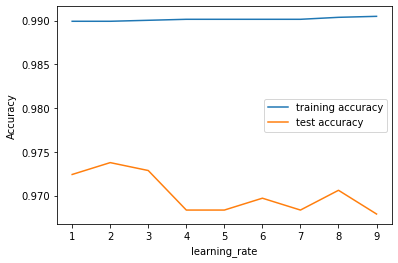

In [65]:
#plotting the training & testing accuracy for n_estimators from 1 to 50
plt.figure(figsize=None)
plt.plot(depth, training_accuracy, label="training accuracy")
plt.plot(depth, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")  
plt.xlabel("learning_rate")
plt.legend();

In [66]:
#storing the results. The below mentioned order of parameter passing is important.

storeResults('CatBoost Classifier',acc_test_cat,f1_score_test_cat,
             recall_score_train_cat,precision_score_train_cat)

In [67]:

pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [68]:
result = pd.DataFrame({ 'ML Model' : ML_Model,
                        'Accuracy' : accuracy,
                        'f1_score' : f1_score,
                        'Recall'   : recall,
                        'Precision': precision,
                      })

In [69]:
result

,ML Model,Accuracy,f1_score,Recall,Precision
0,Logistic Regression,0.924,0.933,0.947,0.927
1,K-Nearest Neighbors,0.944,0.950,0.962,0.996
2,Naive Bayes Classifier,0.583,0.420,0.291,0.996
3,Decision Tree,0.960,0.965,0.992,0.991
4,Random Forest,0.969,0.973,0.995,0.987
5,Gradient Boosting Classifier,0.971,0.975,0.992,0.985
6,CatBoost Classifier,0.972,0.976,0.994,0.987


In [70]:
#Sorting the datafram on accuracy
sorted_result=result.sort_values(by=['Accuracy', 'f1_score'],ascending=False).reset_index(drop=True)

In [71]:
# dispalying total result
sorted_result

,ML Model,Accuracy,f1_score,Recall,Precision
0,CatBoost Classifier,0.972,0.976,0.994,0.987
1,Gradient Boosting Classifier,0.971,0.975,0.992,0.985
2,Random Forest,0.969,0.973,0.995,0.987
3,Decision Tree,0.960,0.965,0.992,0.991
4,K-Nearest Neighbors,0.944,0.950,0.962,0.996
5,Logistic Regression,0.924,0.933,0.947,0.927
6,Naive Bayes Classifier,0.583,0.420,0.291,0.996


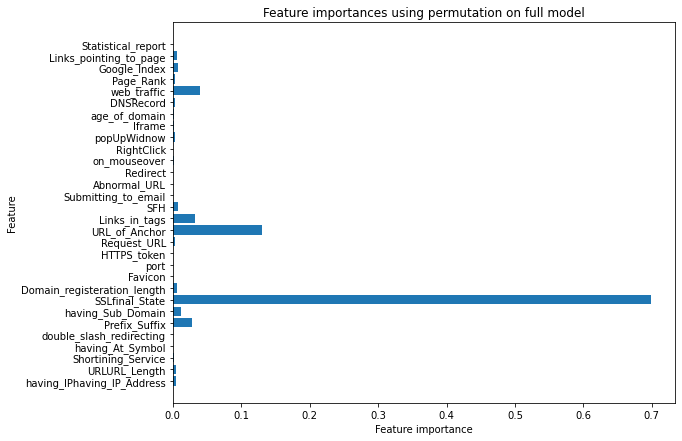

In [72]:
plt.figure(figsize=(9,7))
n_features = X_train.shape[1]
plt.barh(range(n_features), gbc.feature_importances_, align='center')
plt.yticks(np.arange(n_features), X_train.columns)
plt.title("Feature importances using permutation on full model")
plt.xlabel("Feature importance")
plt.ylabel("Feature")
plt.show()

# IBM DEPLOYEMENT

In [73]:
!pip install -U ibm-watson-machine-learning

In [74]:
from ibm_watson_machine_learning import APIClient
import json

In [75]:
wml_credentials = {
    "apikey":"gxDSf08ErhzR4JbENlUqX_n7VdSlg8UJCRbsd4TY_q_A",
    "url":"https://us-south.ml.cloud.ibm.com"  
}

In [76]:
wml_client = APIClient(wml_credentials)
wml_client.spaces.list()

Note: 'limit' is not provided. Only first 50 records will be displayed if the number of records exceed 50
------------------------------------  ----------  ------------------------
ID                                    NAME        CREATED
a906e650-29fc-48c9-b8b1-fd8485419a23  deploy Wml  2022-11-17T08:35:30.535Z
4356ef1c-1101-4e4d-877a-5f5668464b7d  web deploy  2022-11-12T13:41:03.514Z
------------------------------------  ----------  ------------------------


In [77]:
SPACE_ID= "4356ef1c-1101-4e4d-877a-5f5668464b7d"

In [78]:
wml_client.set.default_space(SPACE_ID)

'SUCCESS'

In [79]:
wml_client.software_specifications.list(500)

-------------------------------  ------------------------------------  ----
NAME                             ASSET_ID                              TYPE
default_py3.6                    0062b8c9-8b7d-44a0-a9b9-46c416adcbd9  base
kernel-spark3.2-scala2.12        020d69ce-7ac1-5e68-ac1a-31189867356a  base
pytorch-onnx_1.3-py3.7-edt       069ea134-3346-5748-b513-49120e15d288  base
scikit-learn_0.20-py3.6          09c5a1d0-9c1e-4473-a344-eb7b665ff687  base
spark-mllib_3.0-scala_2.12       09f4cff0-90a7-5899-b9ed-1ef348aebdee  base
pytorch-onnx_rt22.1-py3.9        0b848dd4-e681-5599-be41-b5f6fccc6471  base
ai-function_0.1-py3.6            0cdb0f1e-5376-4f4d-92dd-da3b69aa9bda  base
shiny-r3.6                       0e6e79df-875e-4f24-8ae9-62dcc2148306  base
tensorflow_2.4-py3.7-horovod     1092590a-307d-563d-9b62-4eb7d64b3f22  base
pytorch_1.1-py3.6                10ac12d6-6b30-4ccd-8392-3e922c096a92  base
tensorflow_1.15-py3.6-ddl        111e41b3-de2d-5422-a4d6-bf776828c4b7  base
autoai-kb_rt

## Save and Deploy the model

In [80]:
import sklearn
sklearn.__version__

'1.0.2'

In [81]:
MODEL_NAME = 'WebPhising'
DEPLOYMENT_NAME = 'deploy Wml'
DEMO_MODEL =gbc

In [82]:
# Set Python Version
software_spec_uid = wml_client.software_specifications.get_id_by_name('runtime-22.1-py3.9')

In [83]:
# Setup model meta
model_props = {
    wml_client.repository.ModelMetaNames.NAME: MODEL_NAME, 
    wml_client.repository.ModelMetaNames.TYPE: 'scikit-learn_1.0', 
    wml_client.repository.ModelMetaNames.SOFTWARE_SPEC_UID: software_spec_uid 
}

In [84]:
#Save model
model_details = wml_client.repository.store_model(
    model=DEMO_MODEL, 
    meta_props=model_props, 
    training_data=X_train, 
    training_target=y_train
)

In [85]:
model_details

{'entity': {'hybrid_pipeline_software_specs': [],
  'label_column': 'Result',
  'schemas': {'input': [{'fields': [{'name': 'having_IPhaving_IP_Address',
       'type': 'int64'},
      {'name': 'URLURL_Length', 'type': 'int64'},
      {'name': 'Shortining_Service', 'type': 'int64'},
      {'name': 'having_At_Symbol', 'type': 'int64'},
      {'name': 'double_slash_redirecting', 'type': 'int64'},
      {'name': 'Prefix_Suffix', 'type': 'int64'},
      {'name': 'having_Sub_Domain', 'type': 'int64'},
      {'name': 'SSLfinal_State', 'type': 'int64'},
      {'name': 'Domain_registeration_length', 'type': 'int64'},
      {'name': 'Favicon', 'type': 'int64'},
      {'name': 'port', 'type': 'int64'},
      {'name': 'HTTPS_token', 'type': 'int64'},
      {'name': 'Request_URL', 'type': 'int64'},
      {'name': 'URL_of_Anchor', 'type': 'int64'},
      {'name': 'Links_in_tags', 'type': 'int64'},
      {'name': 'SFH', 'type': 'int64'},
      {'name': 'Submitting_to_email', 'type': 'int64'},
      {

In [86]:
model_id = wml_client.repository.get_model_id(model_details)
model_id

'0fa5b965-96d6-4fa0-ae92-68e9b5adbd75'

In [87]:
# Set meta
deployment_props = {
    wml_client.deployments.ConfigurationMetaNames.NAME:DEPLOYMENT_NAME, 
    wml_client.deployments.ConfigurationMetaNames.ONLINE: {}
}
    

In [88]:
wml_client.repository.ModelMetaNames.show()

------------------------  ----  --------  ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
META_PROP NAME            TYPE  REQUIRED  SCHEMA
NAME                      str   Y
DESCRIPTION               str   N
INPUT_DATA_SCHEMA         list  N         {'id(required)': 'string', 'fields(required)': [{'name(required)': 'string', 'type(required)': 'string', 'nullable(optional)': 'string'}]}
TRAINING_DATA_REFERENCES  list  N         [{'name(optional)': 'string', 'type(required)': 'string', 'connection(required)': {'endpoint_url(required)': 'string', 'access_key_id(required)': 'string', 'secret_access_key(required)': 'string'},

# Download the model

@  Dowload the trained model which is deployed in IBM Cloud.

In [91]:
wml_client.repository.download(model_id, filename="DEMO_MODEL")

Successfully saved model content to file: 'DEMO_MODEL'


'/home/wsuser/work/DEMO_MODEL'